In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Red Wine Quality.csv')                          #loading dataset

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes                                  #checking data type of every column of dataset

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All values are in float or int datatype

In [6]:
df.isnull().sum()                                           #checking for null values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

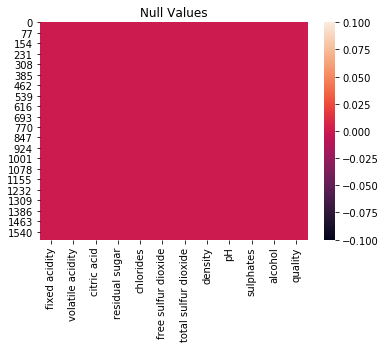

In [7]:
sns.heatmap(df.isnull())                                  #no null values present in the dataset
plt.title('Null Values')
plt.show()

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# EDA

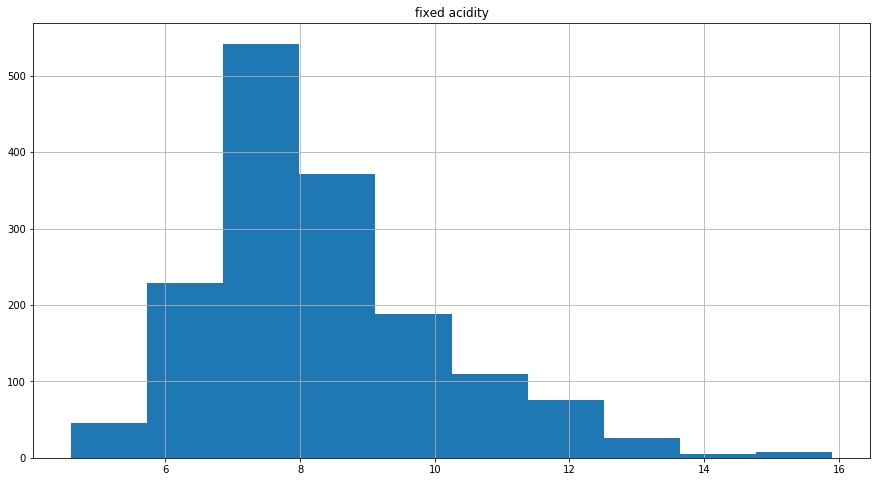

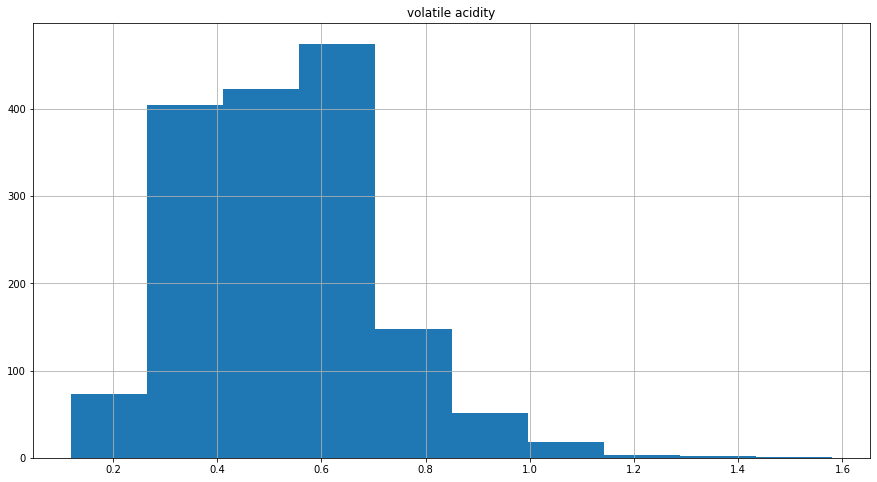

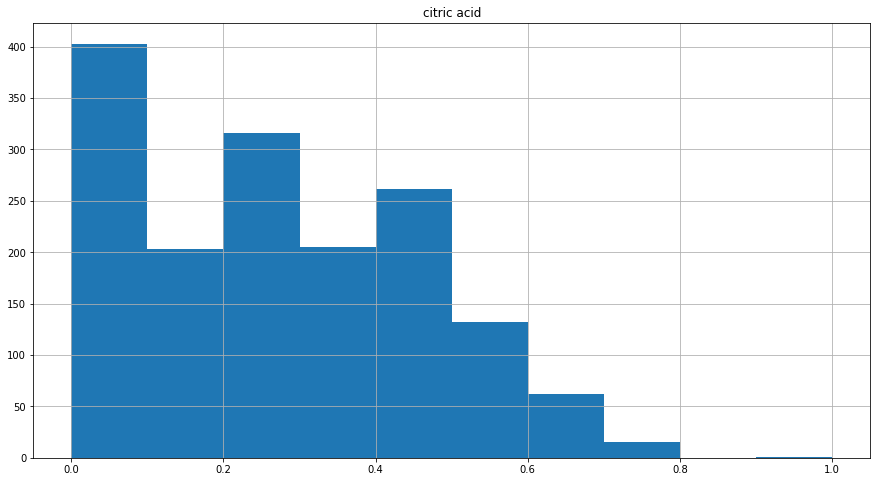

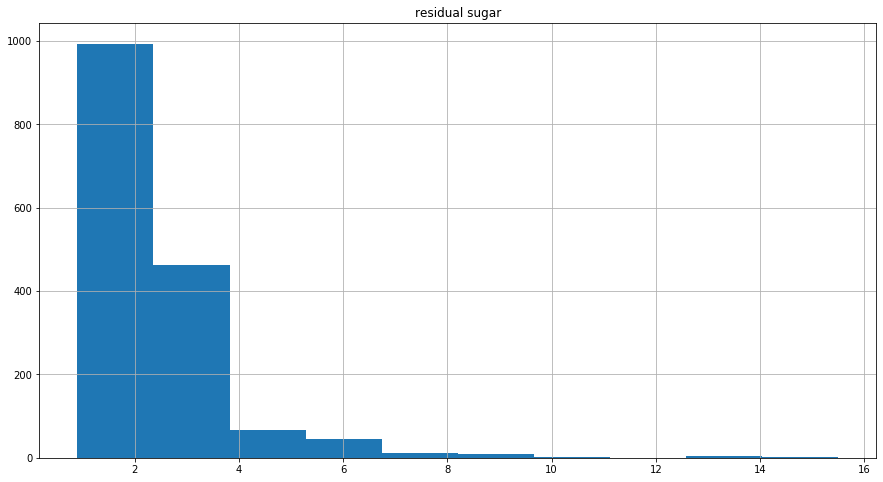

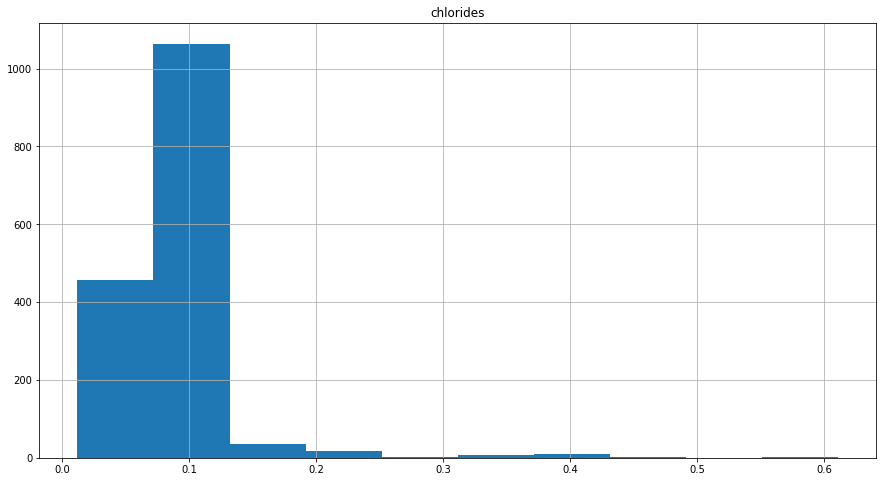

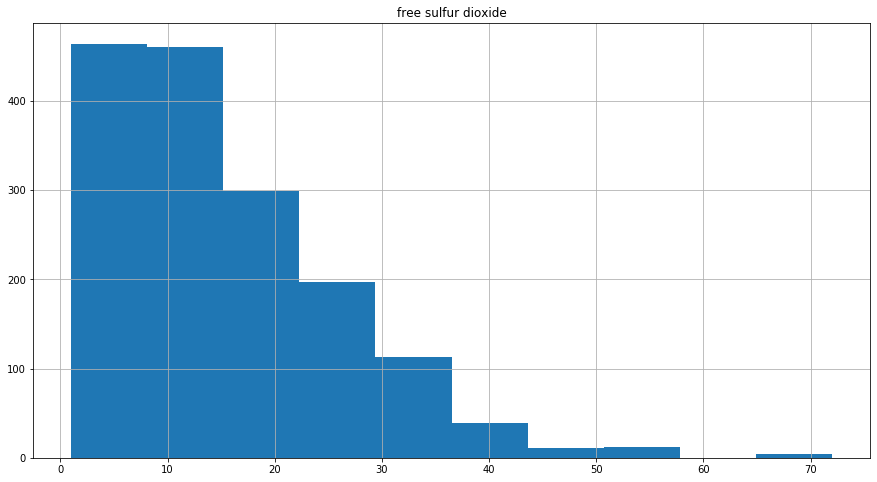

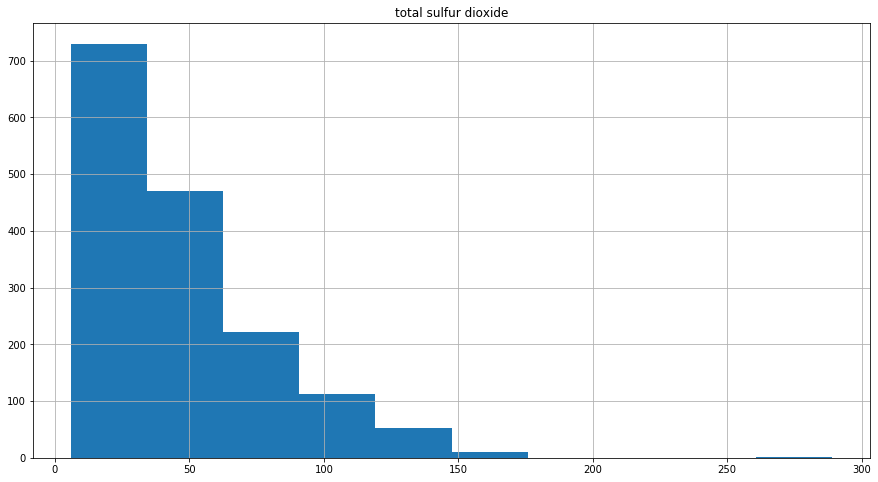

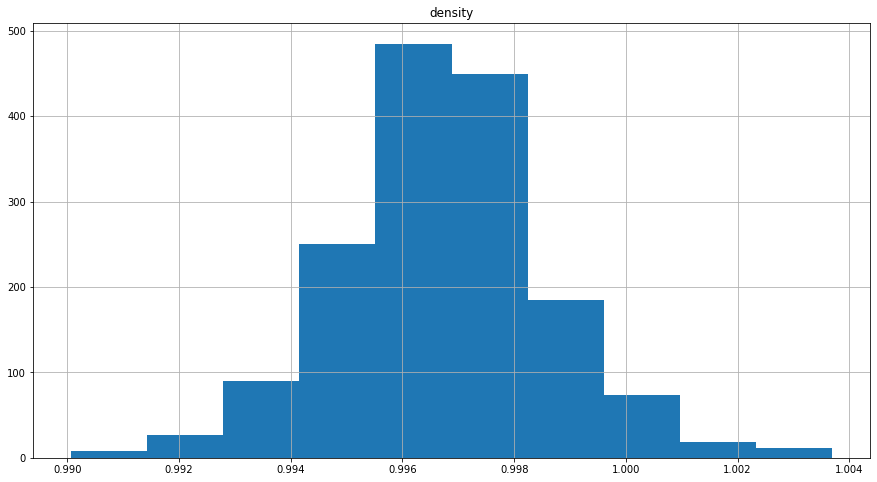

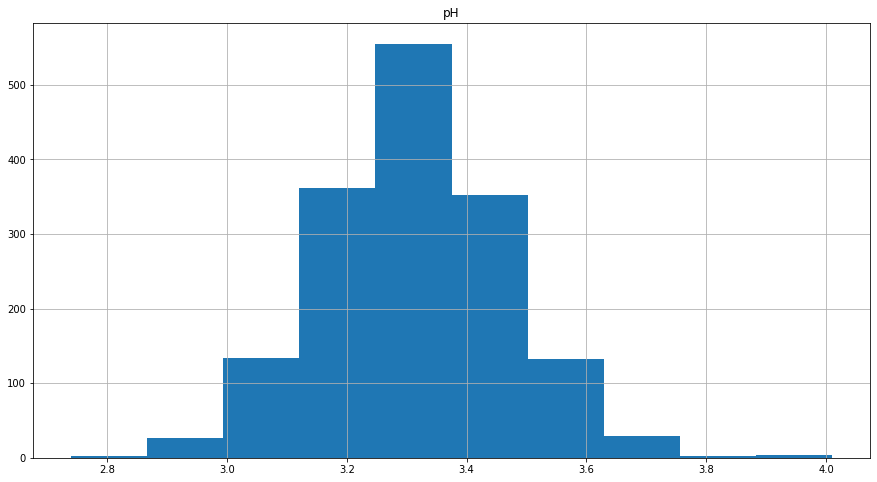

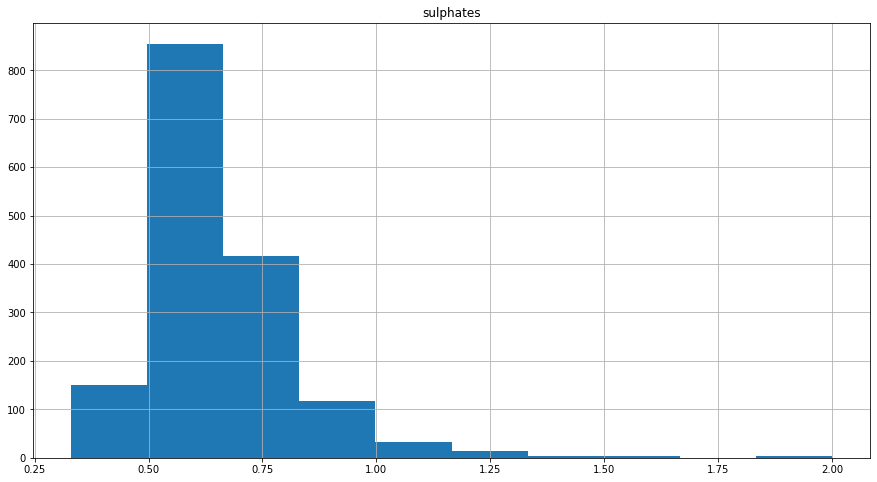

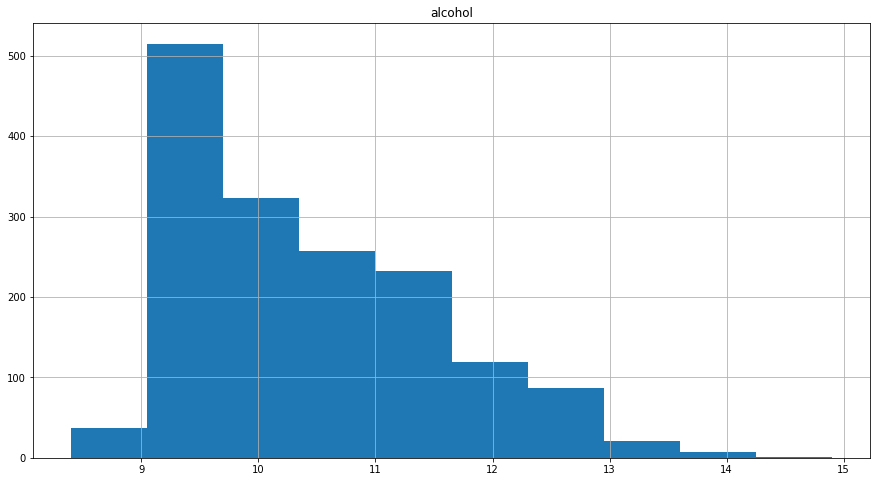

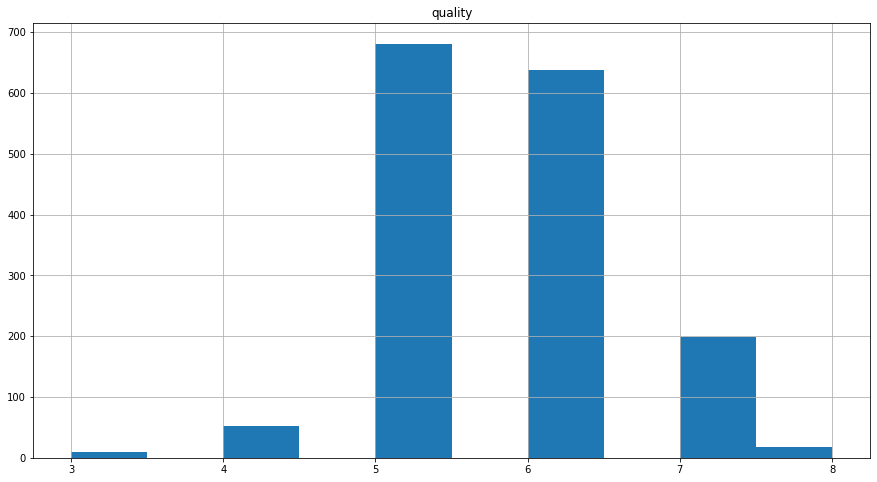

In [10]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',                    #univariate analysis
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for i in columns:
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

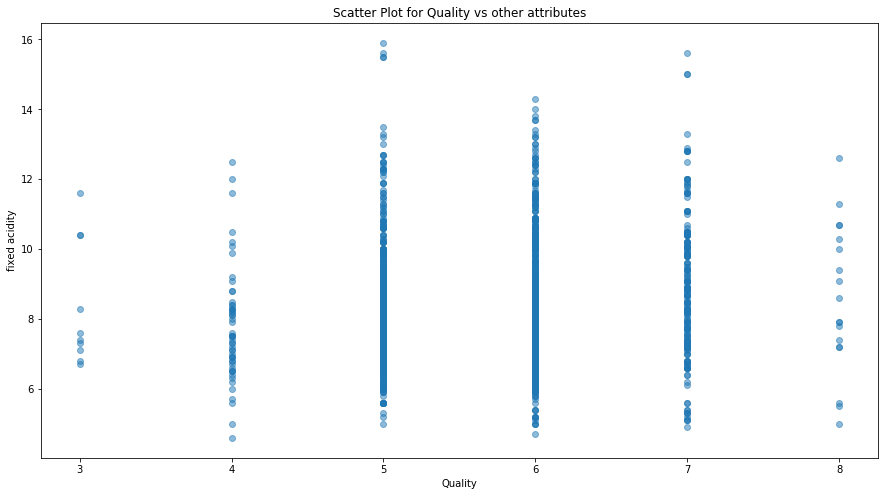

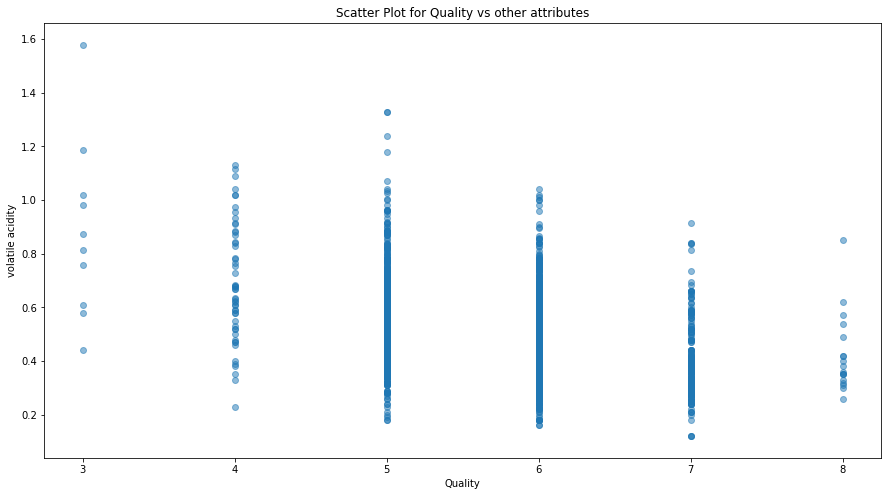

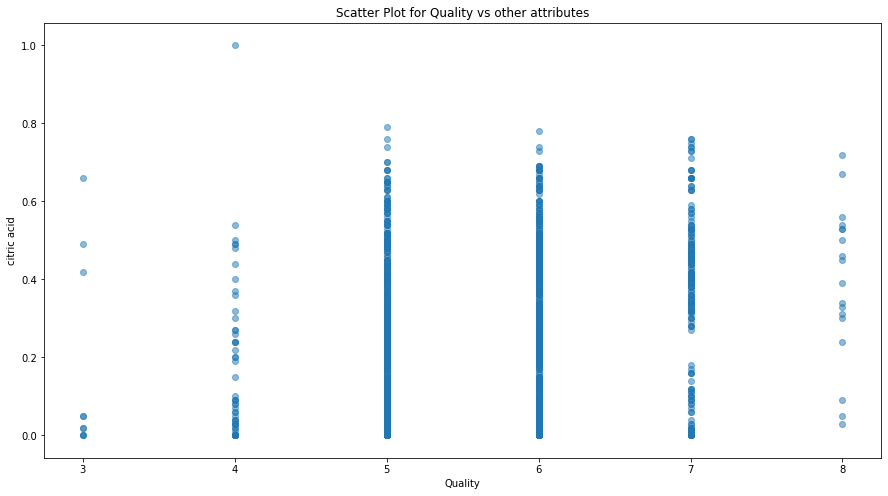

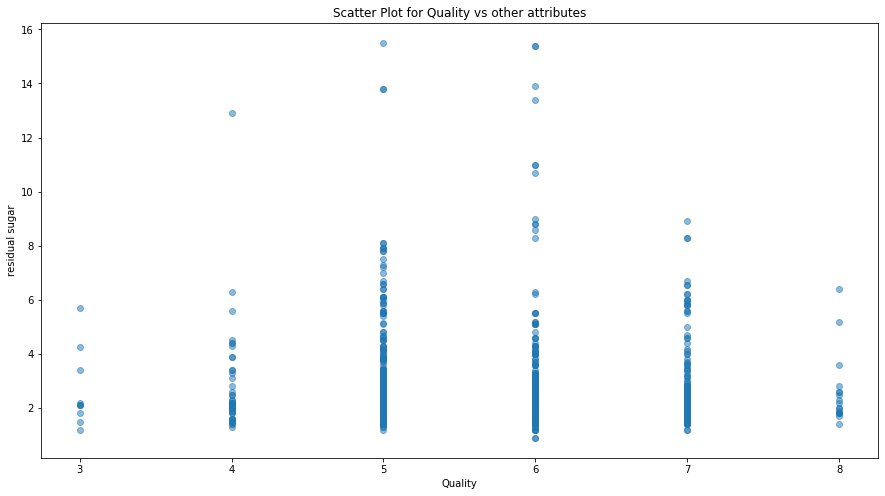

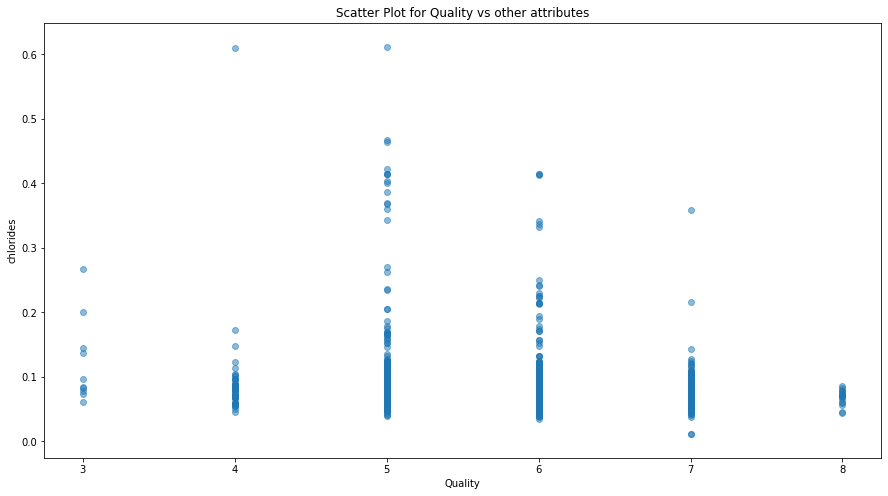

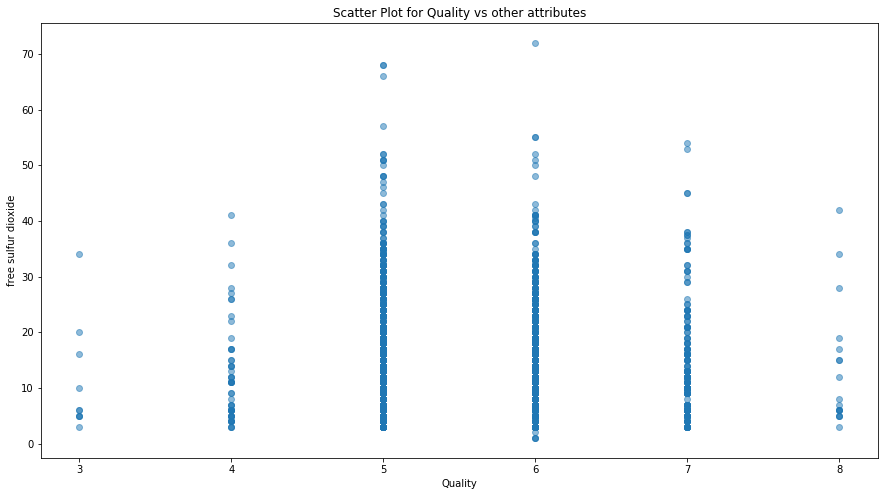

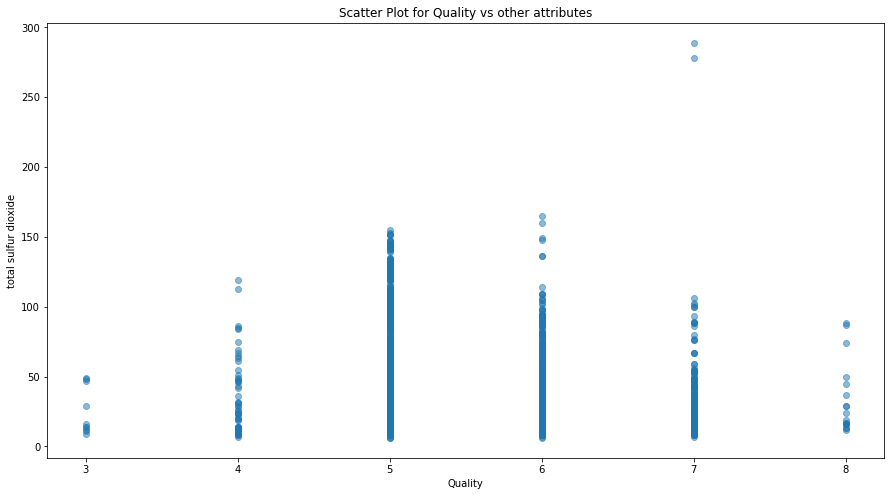

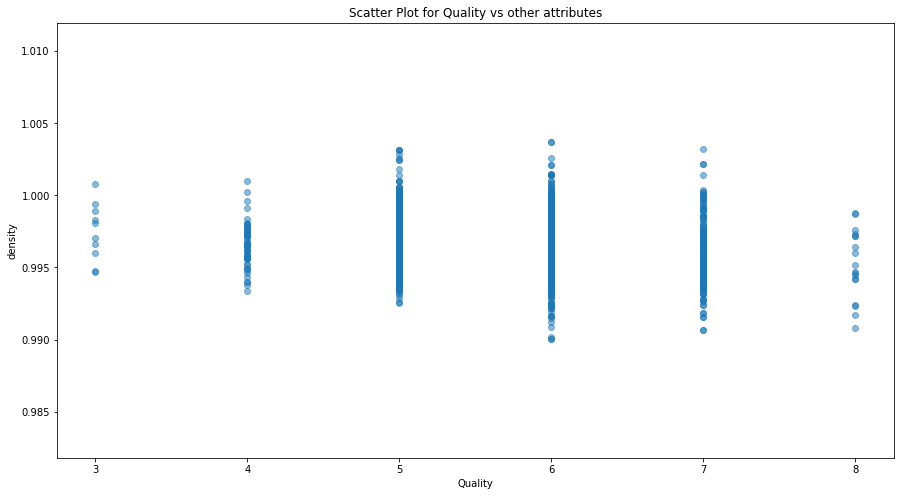

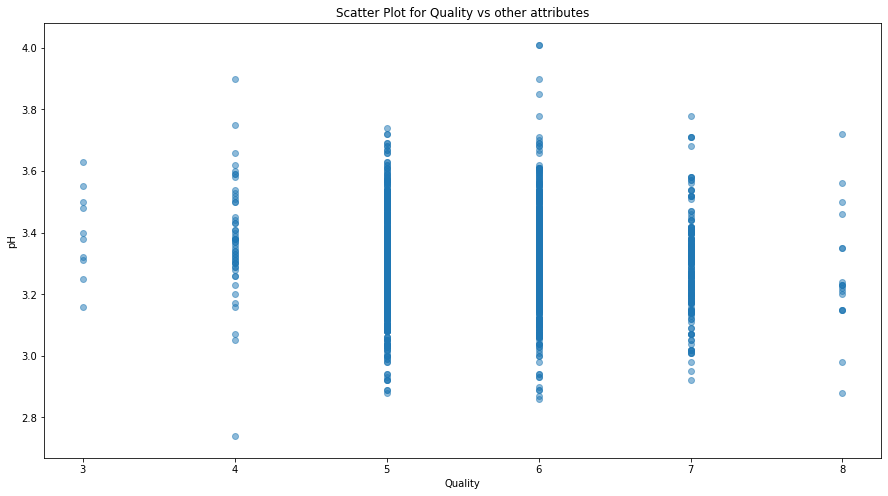

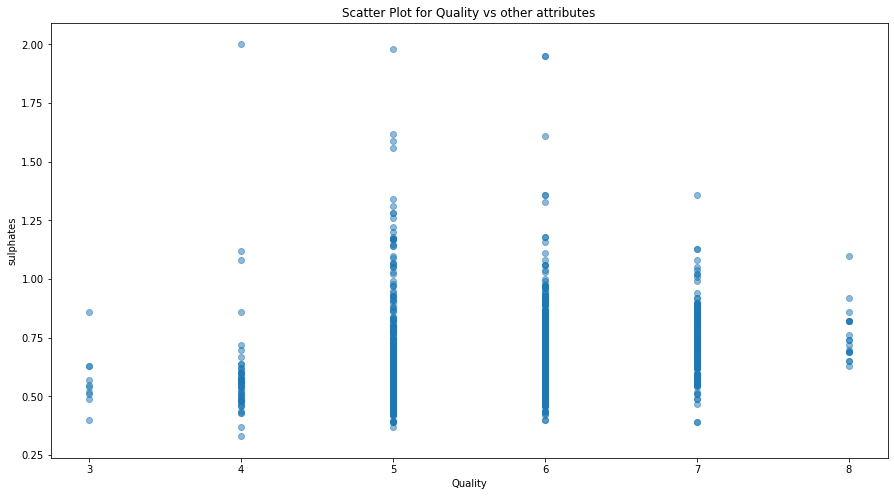

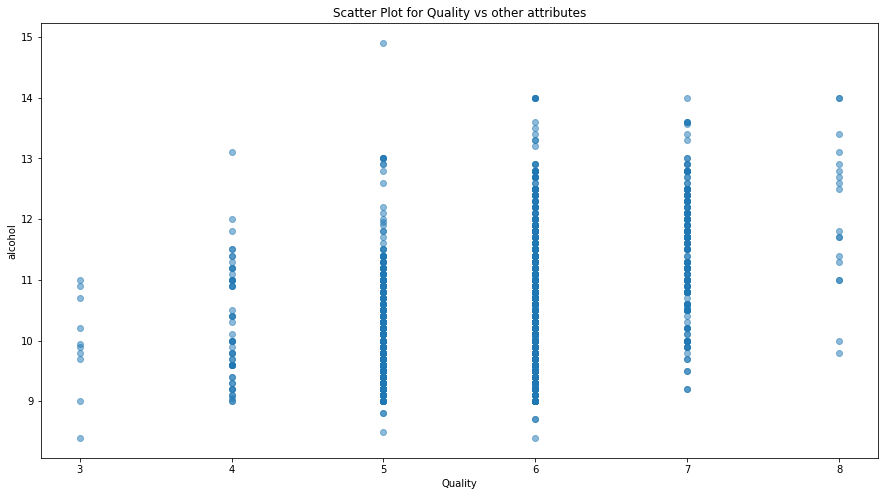

In [11]:
for i in columns[:-1]:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    plt.scatter(df['quality'], df[i], alpha = 0.5)
    plt.title('Scatter Plot for Quality vs other attributes')
    plt.xlabel('Quality')
    plt.ylabel(i)  
    plt.show()

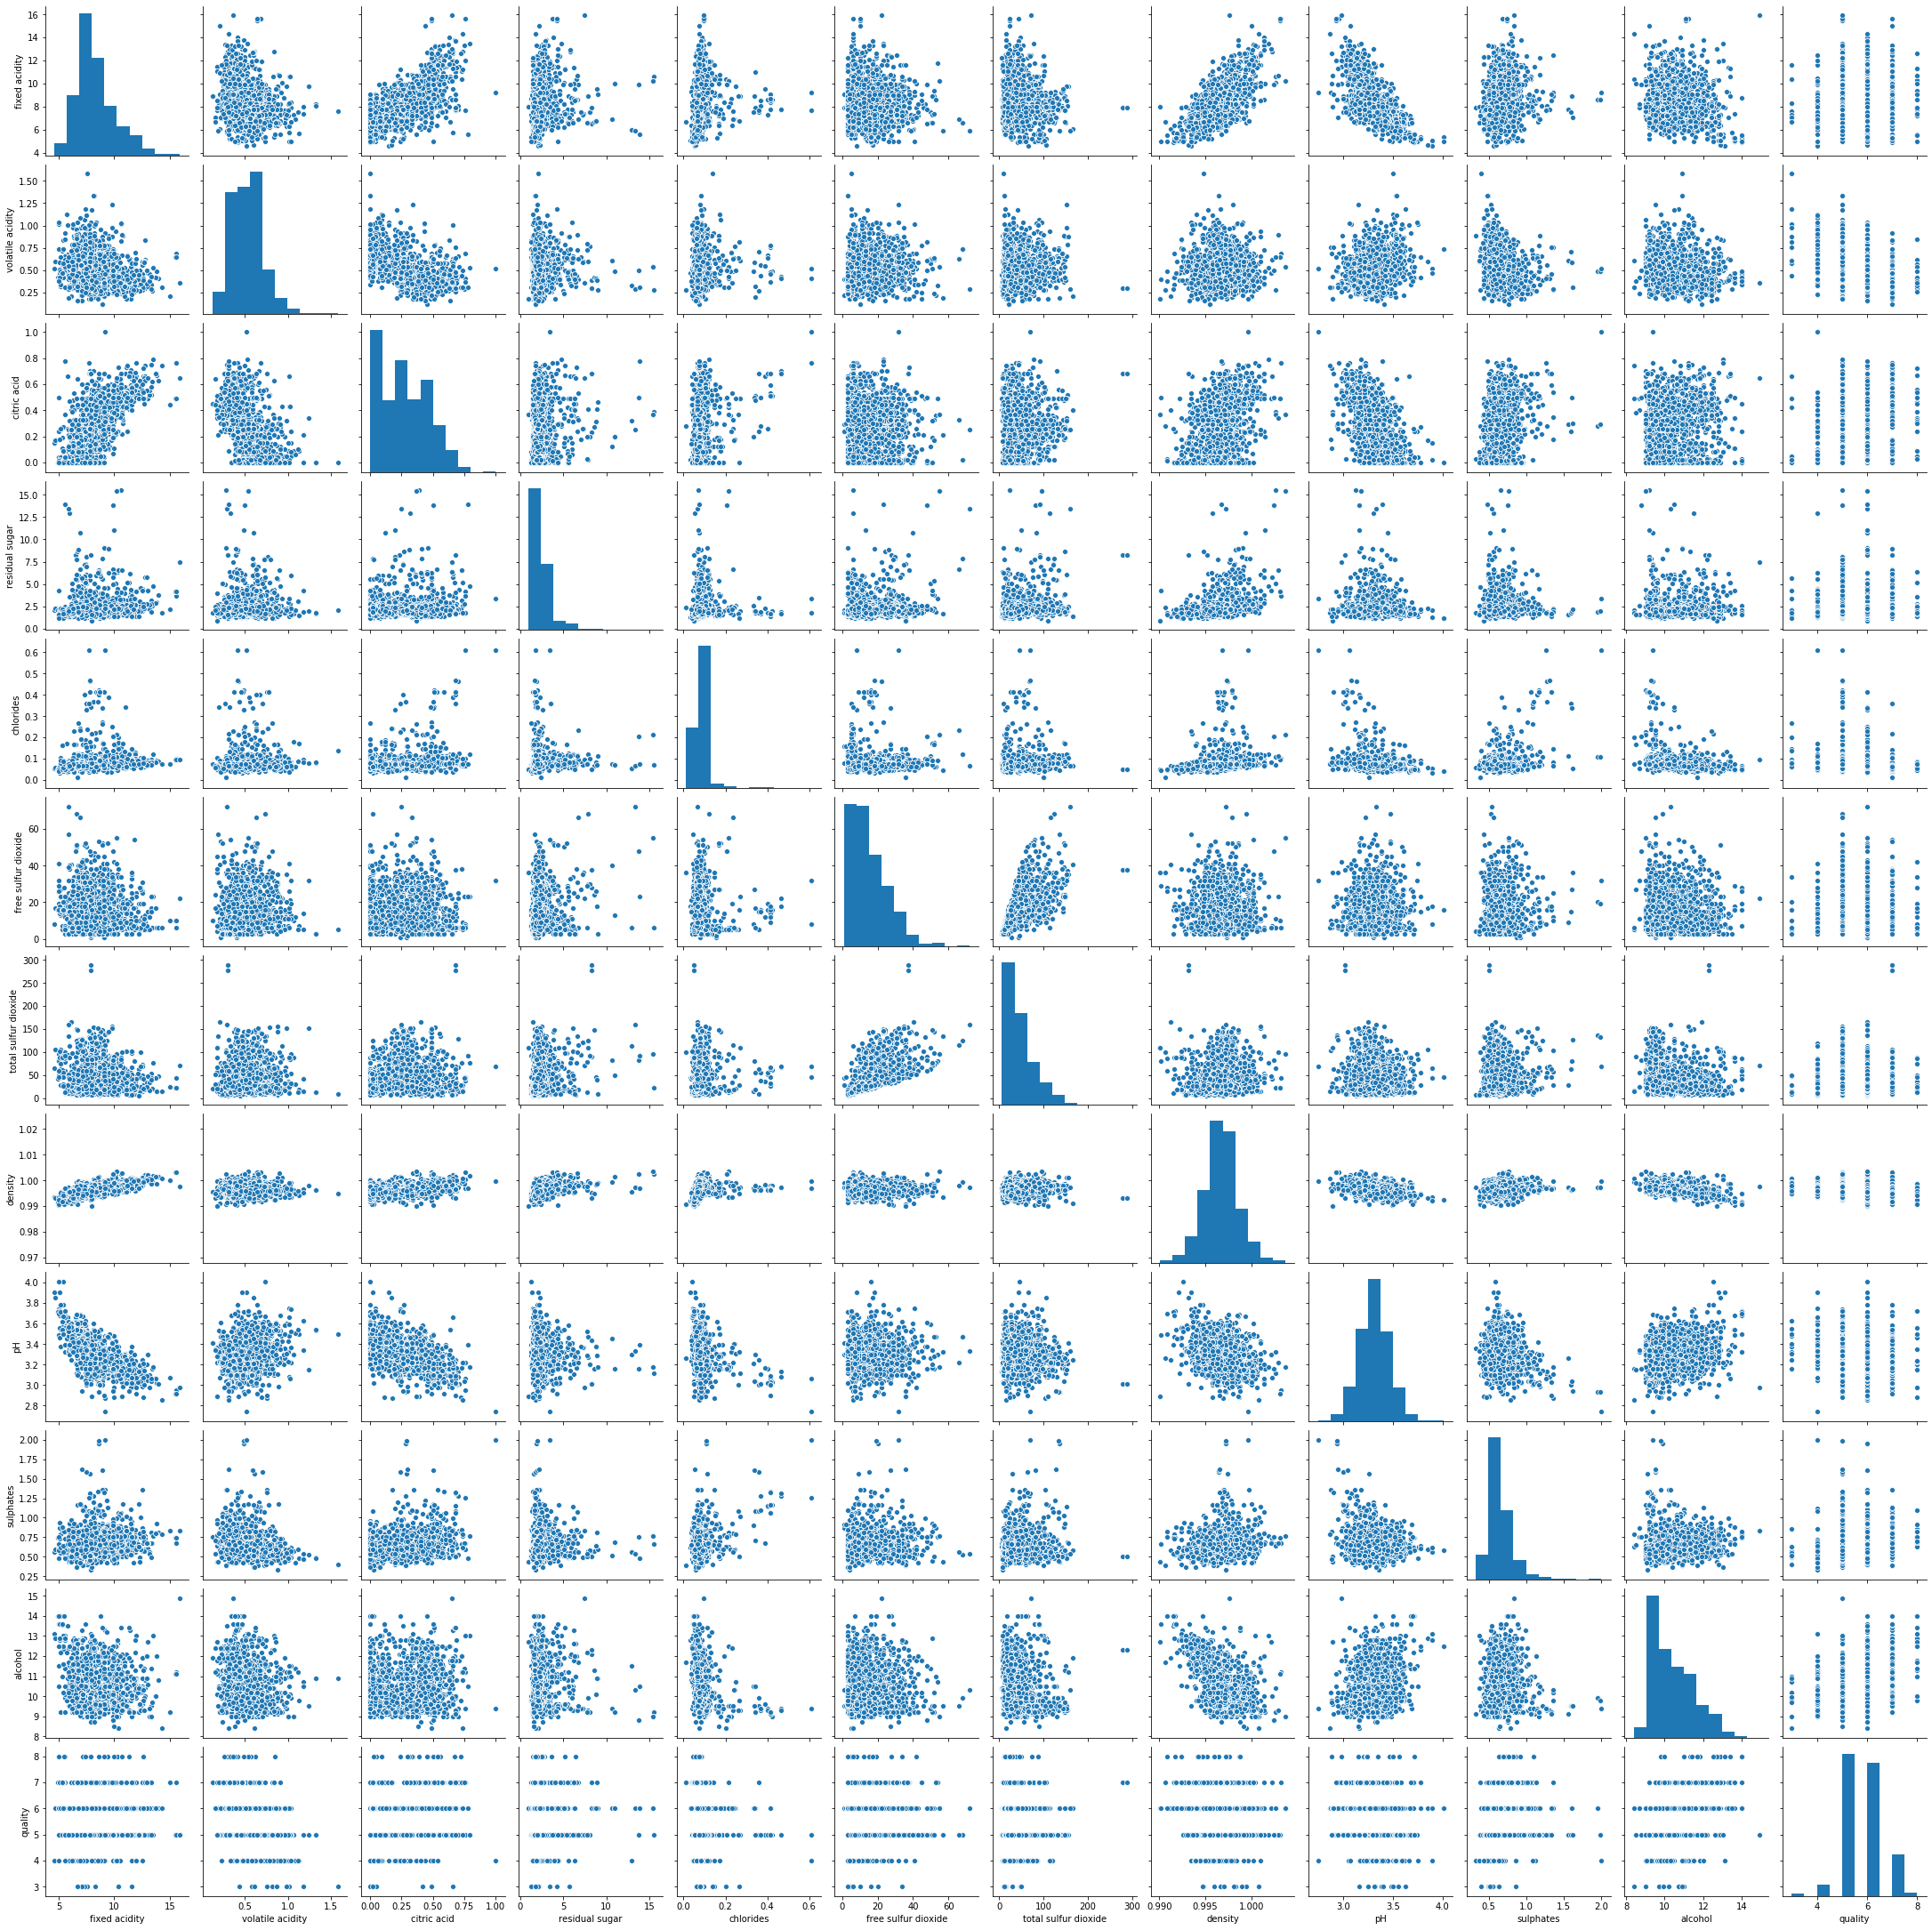

In [12]:
sns.pairplot(df)                                  #multivariate analysis

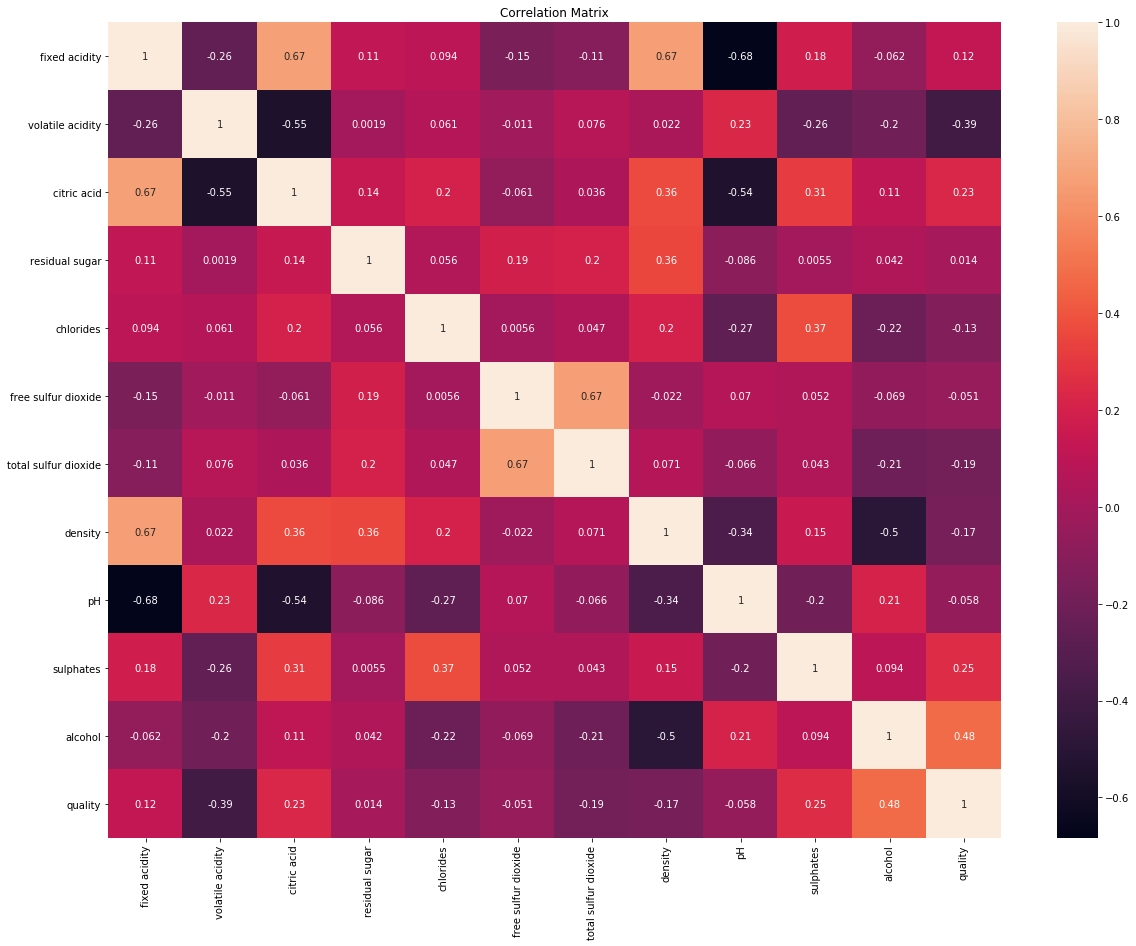

In [13]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Alcohol has highest correlation with quality while volatile acidity has the most negative correlation

# Outliers and Skewness

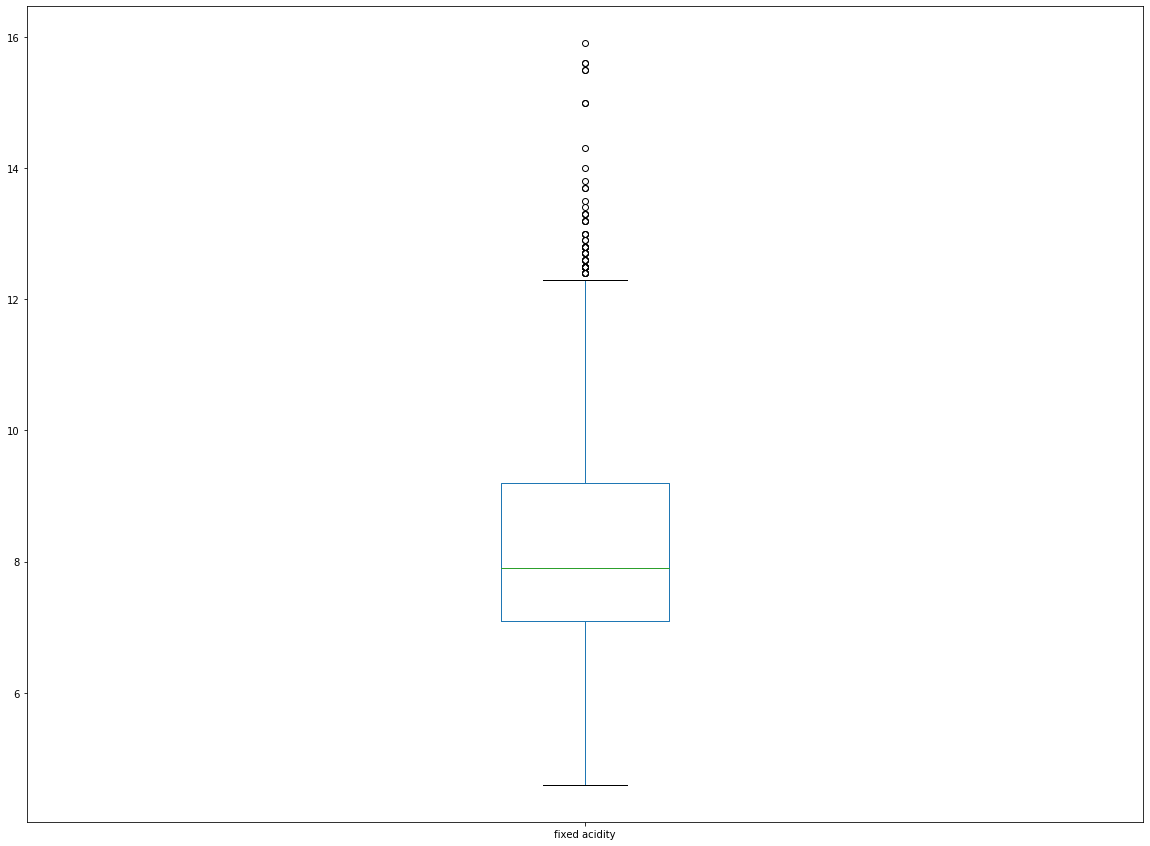

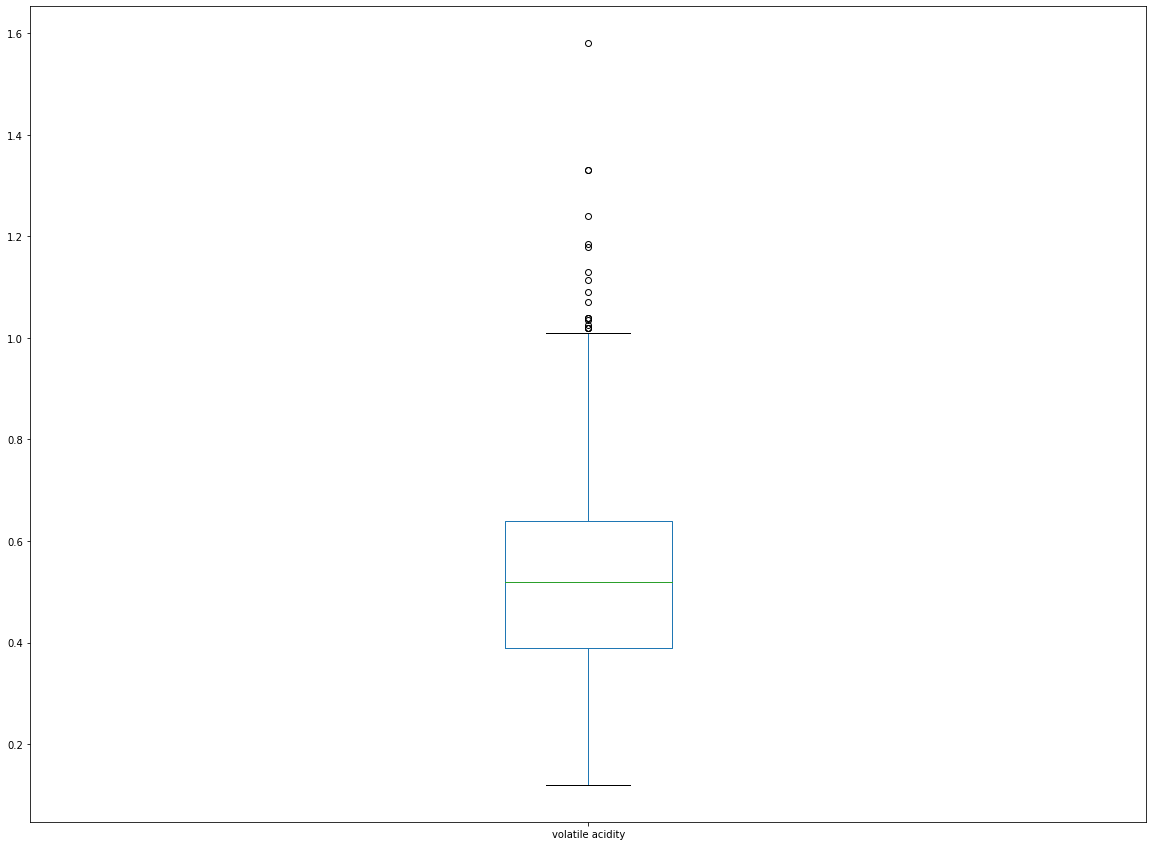

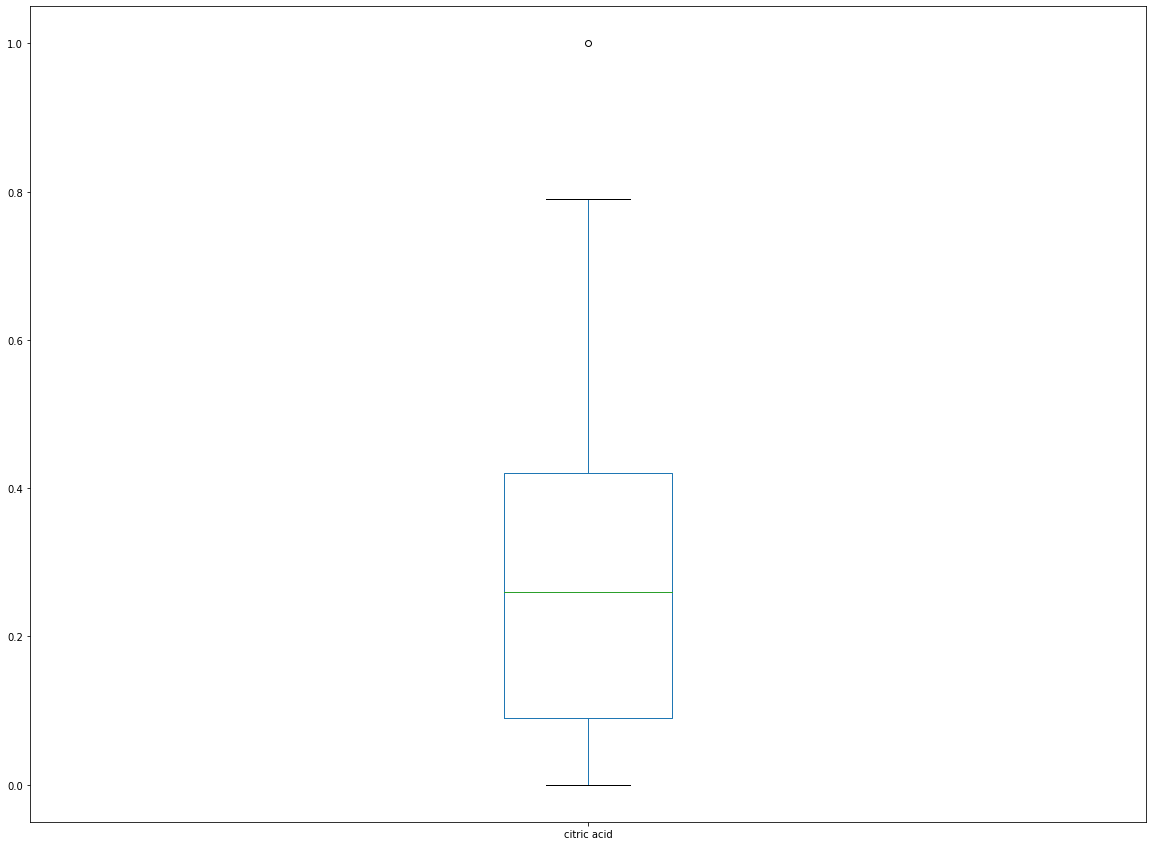

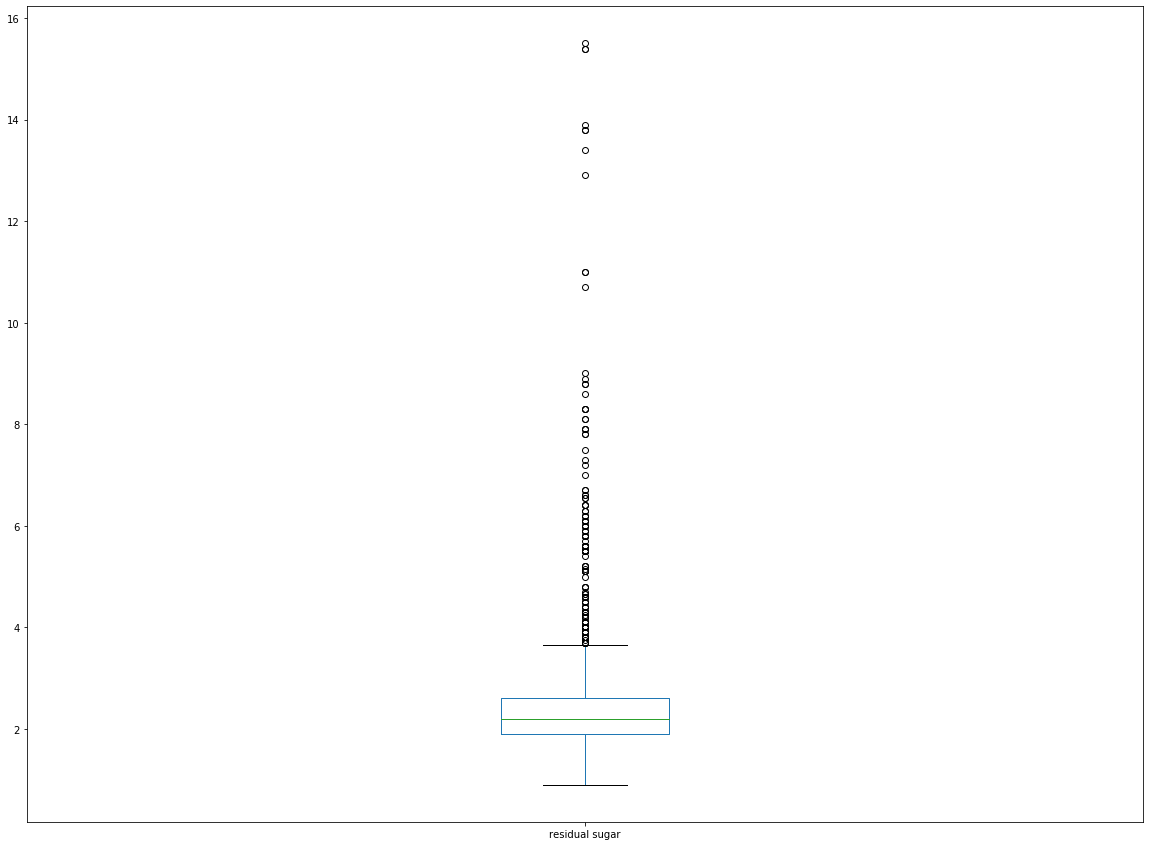

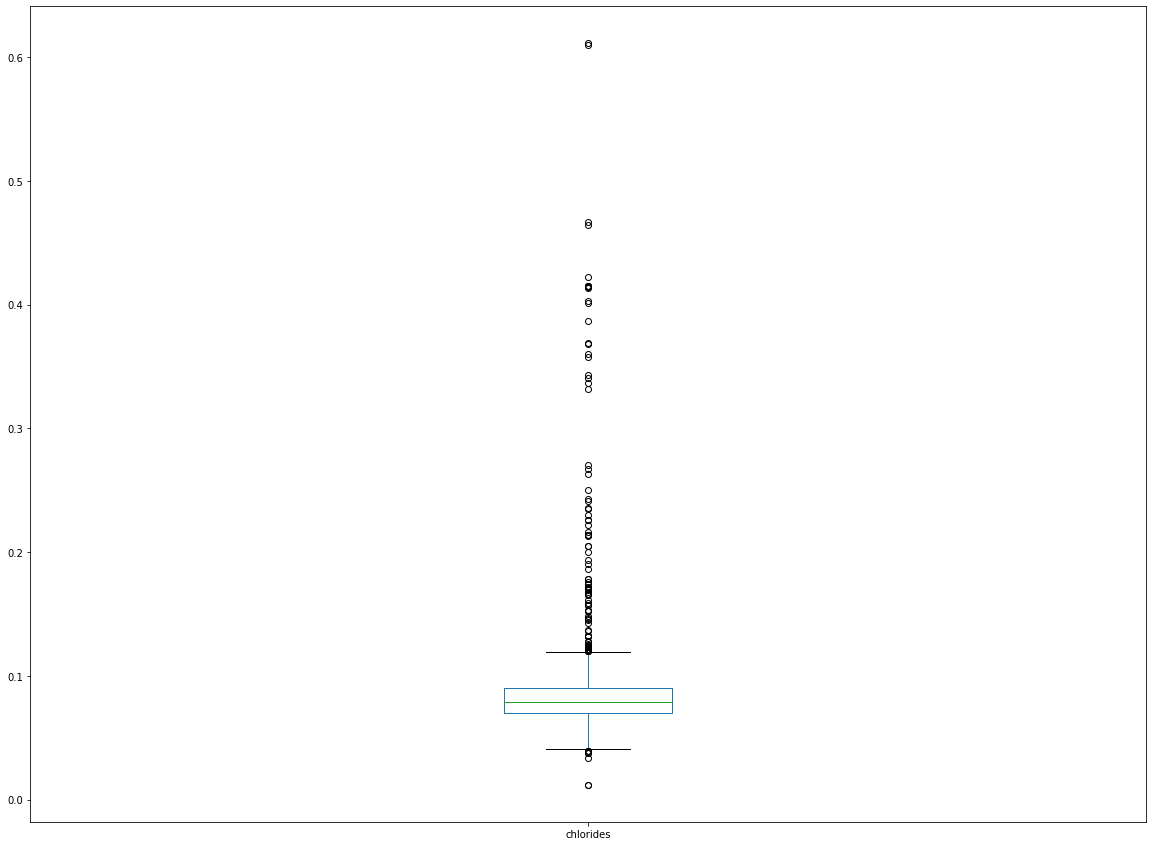

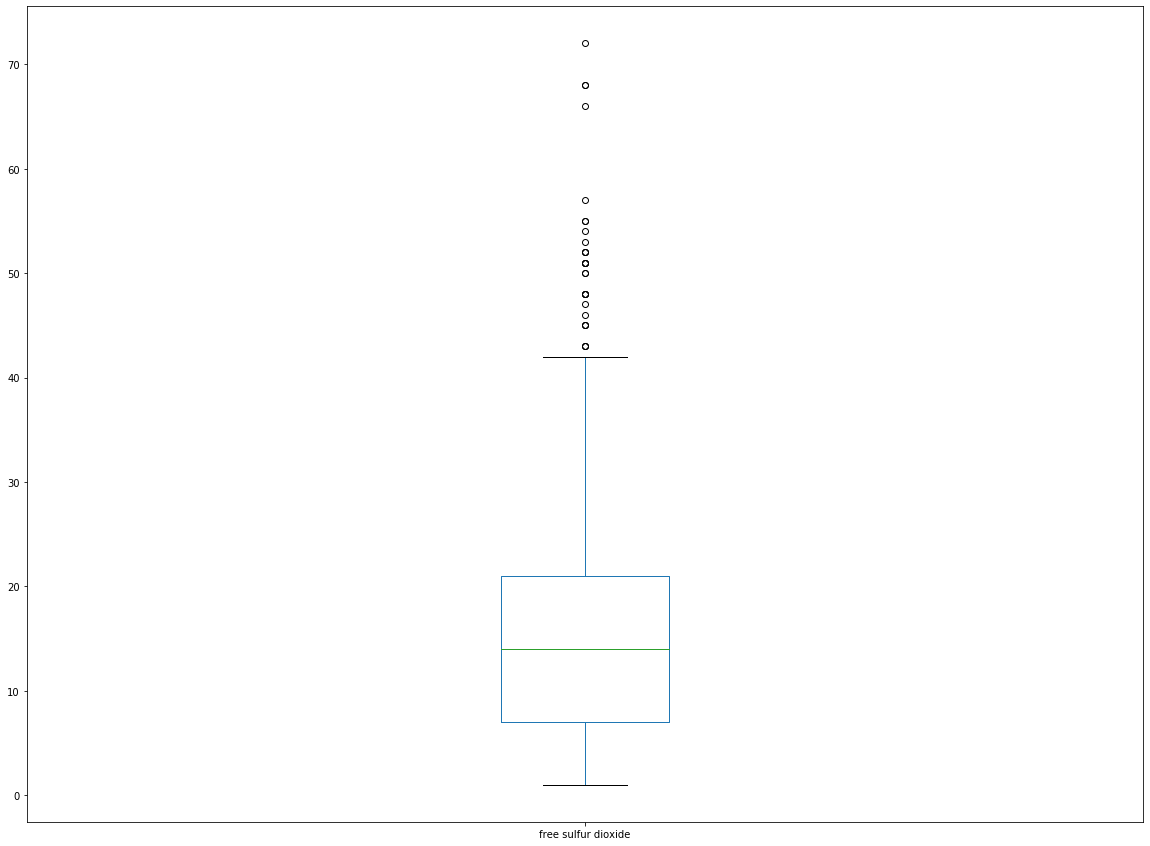

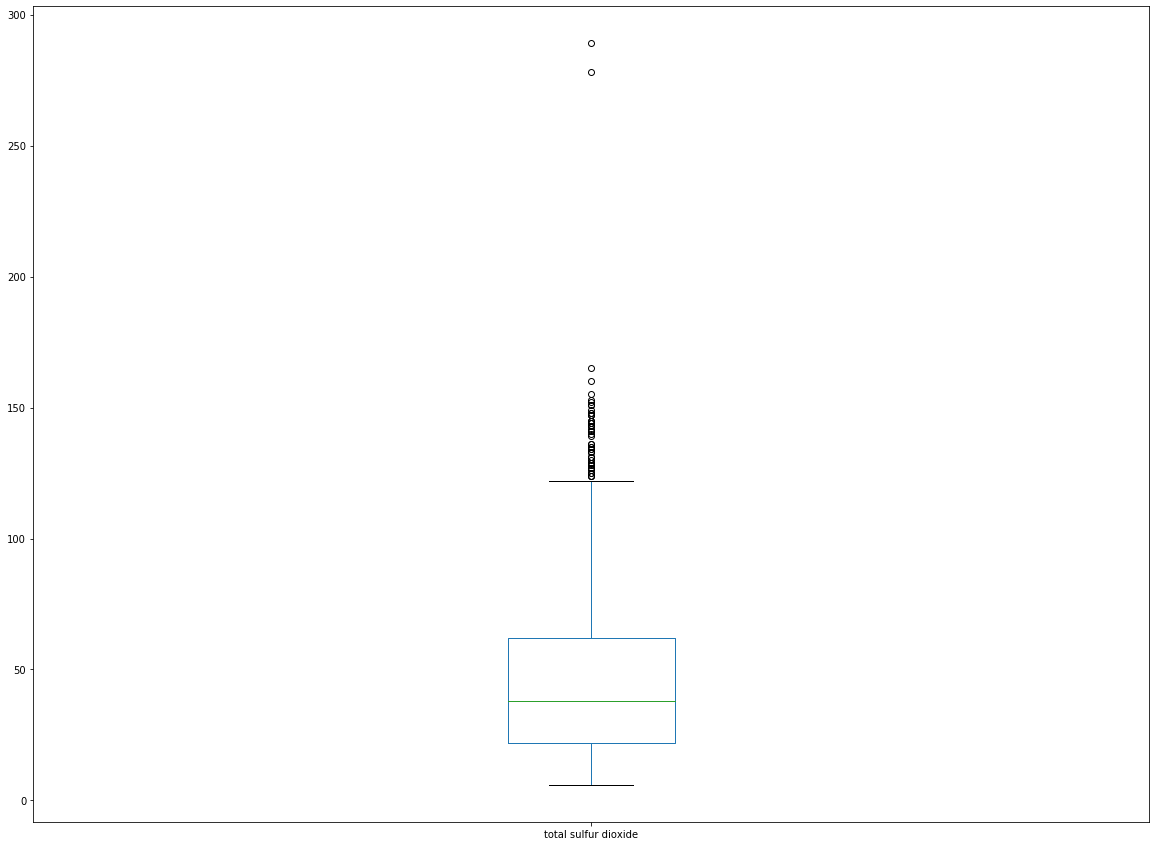

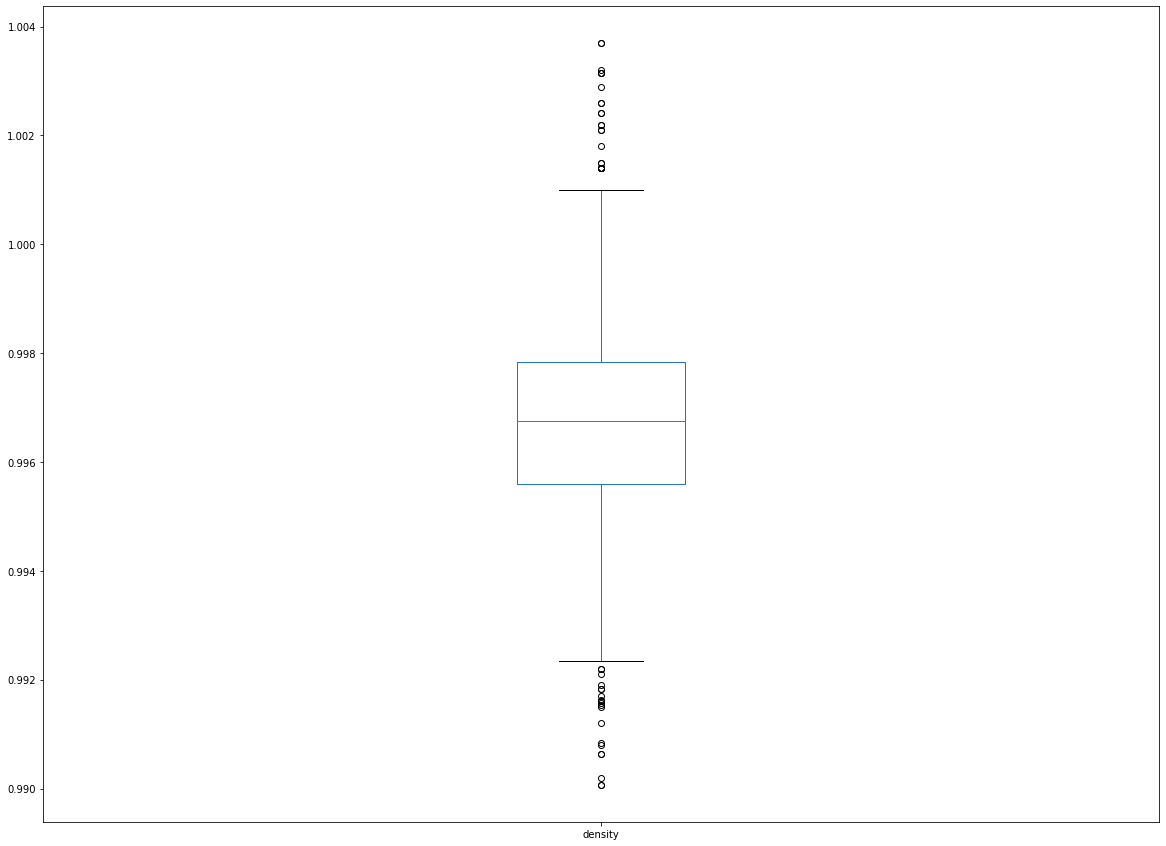

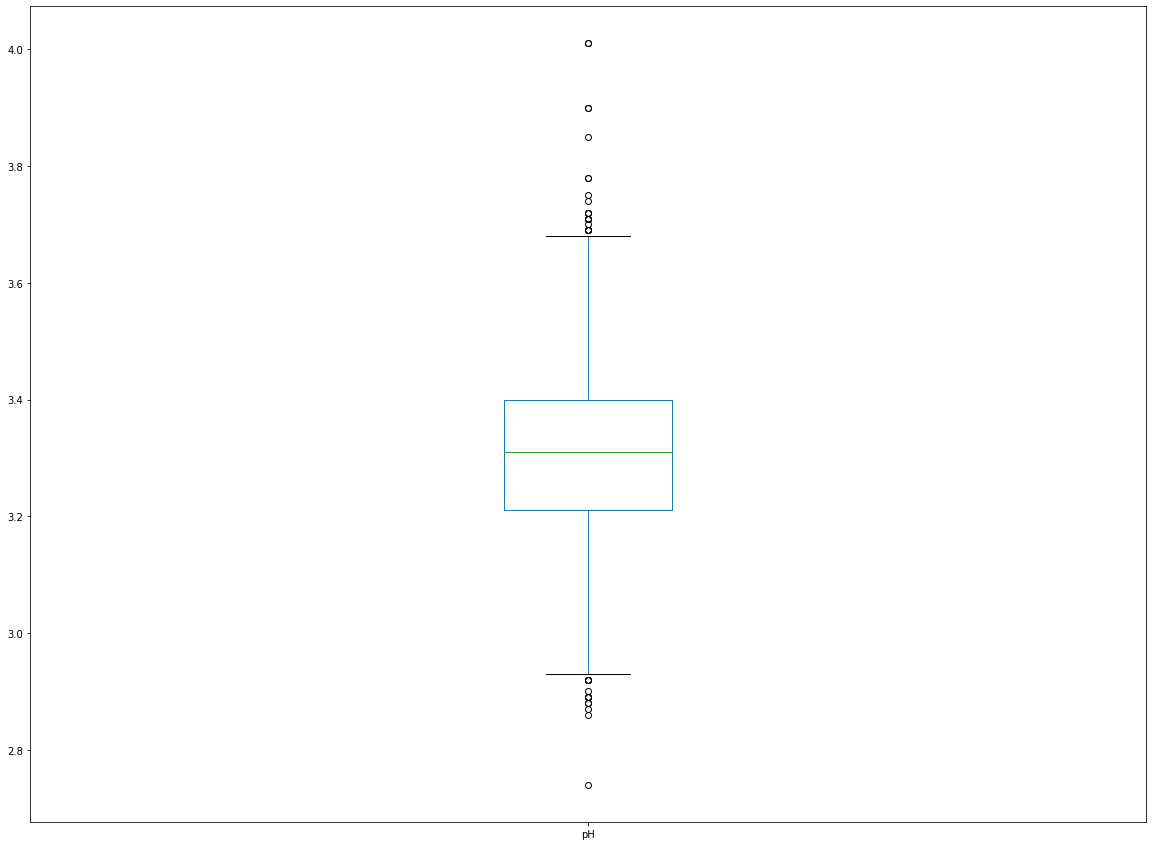

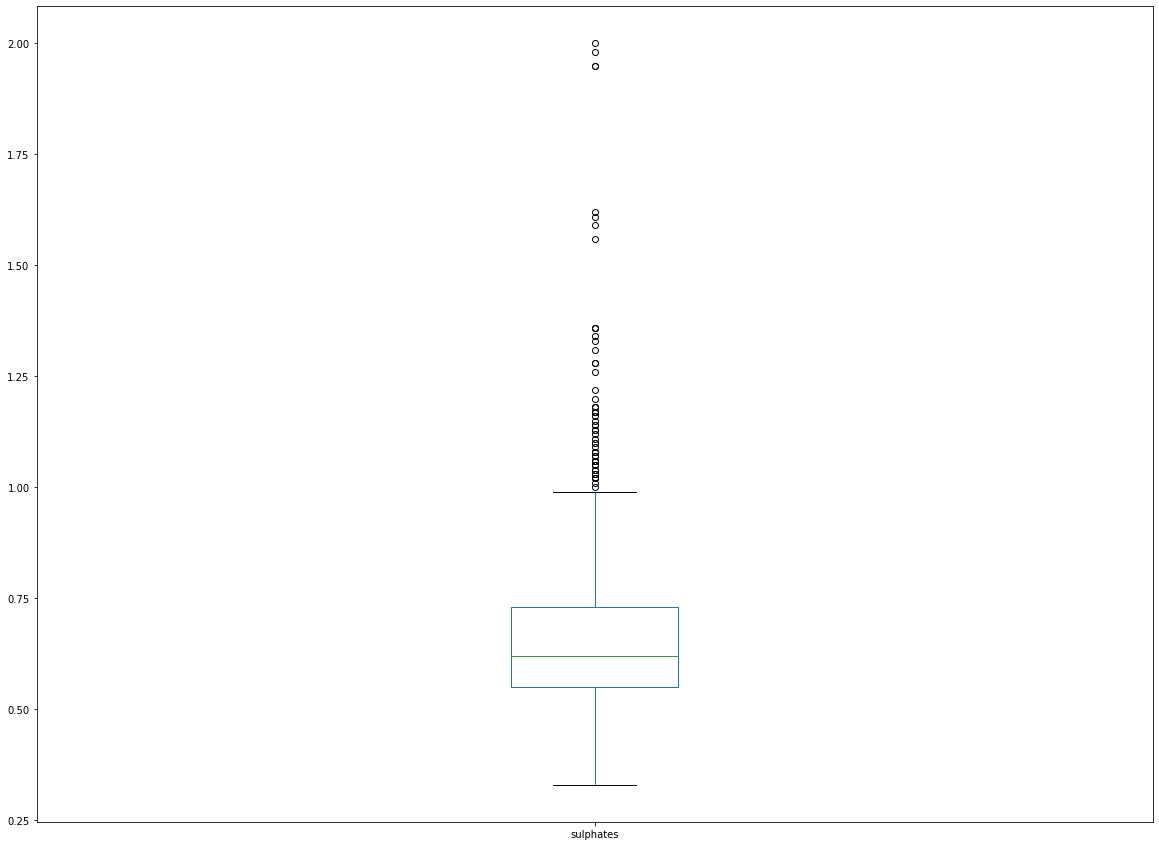

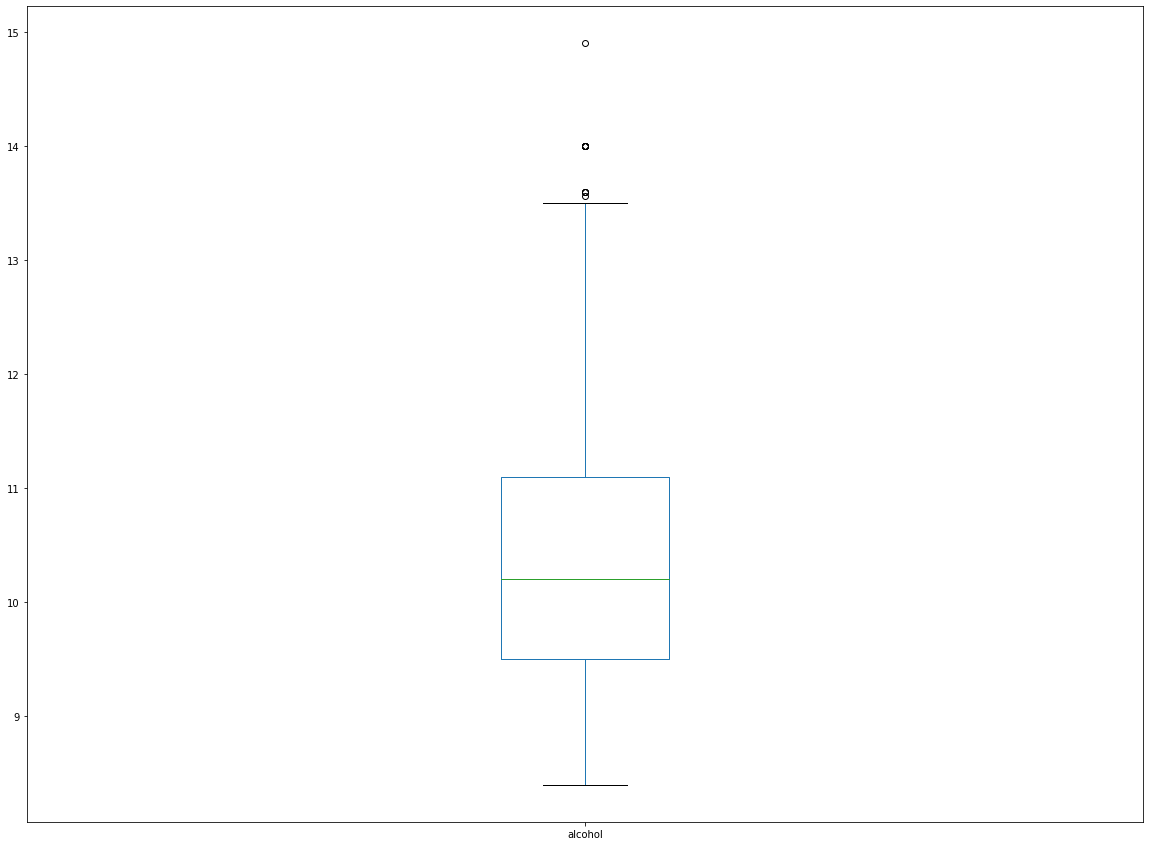

In [14]:
for i in columns[:-1]:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [15]:
from scipy.stats import zscore                       #checking the zscore for every value in dataset
z = np.abs(zscore (df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [16]:
threshold = 3
print (np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [17]:
df_new = df [(z<3).all(axis = 1)]                    #dropping values with zscore higher than 3

In [18]:
df_new.shape

(1451, 12)

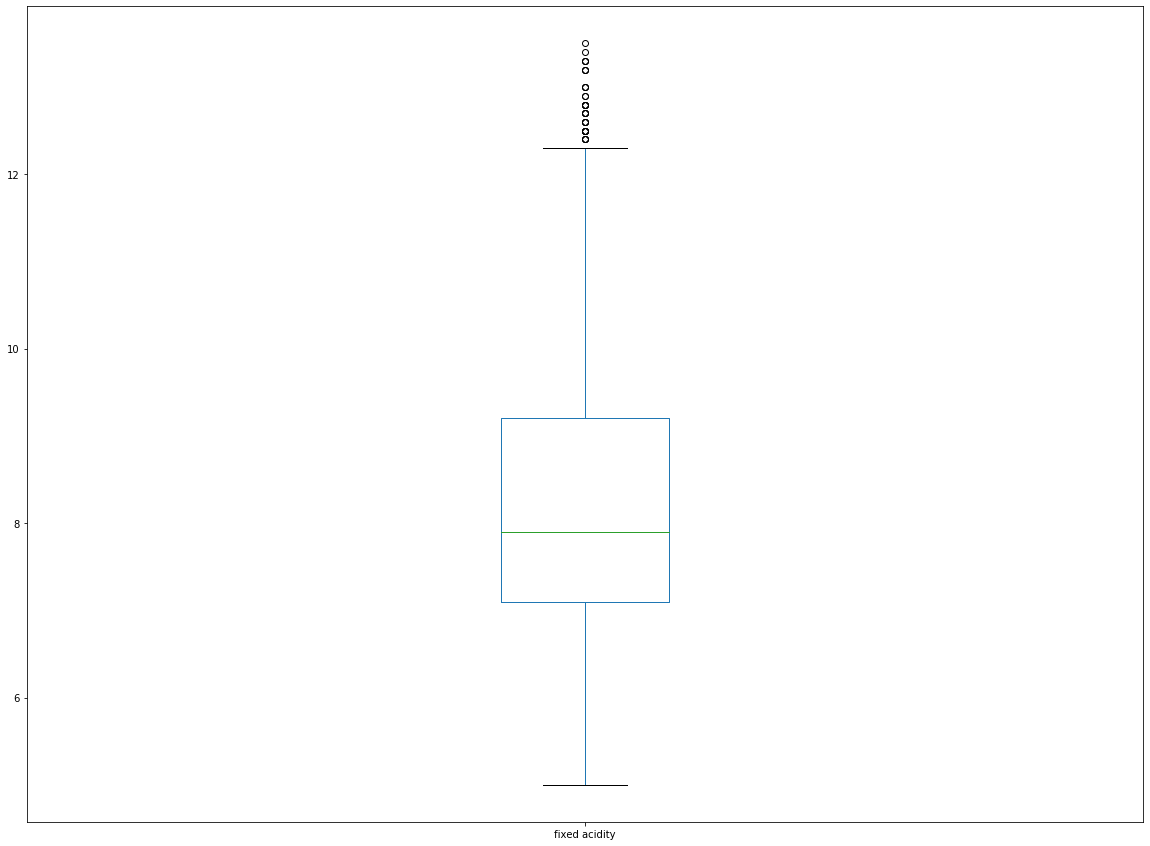

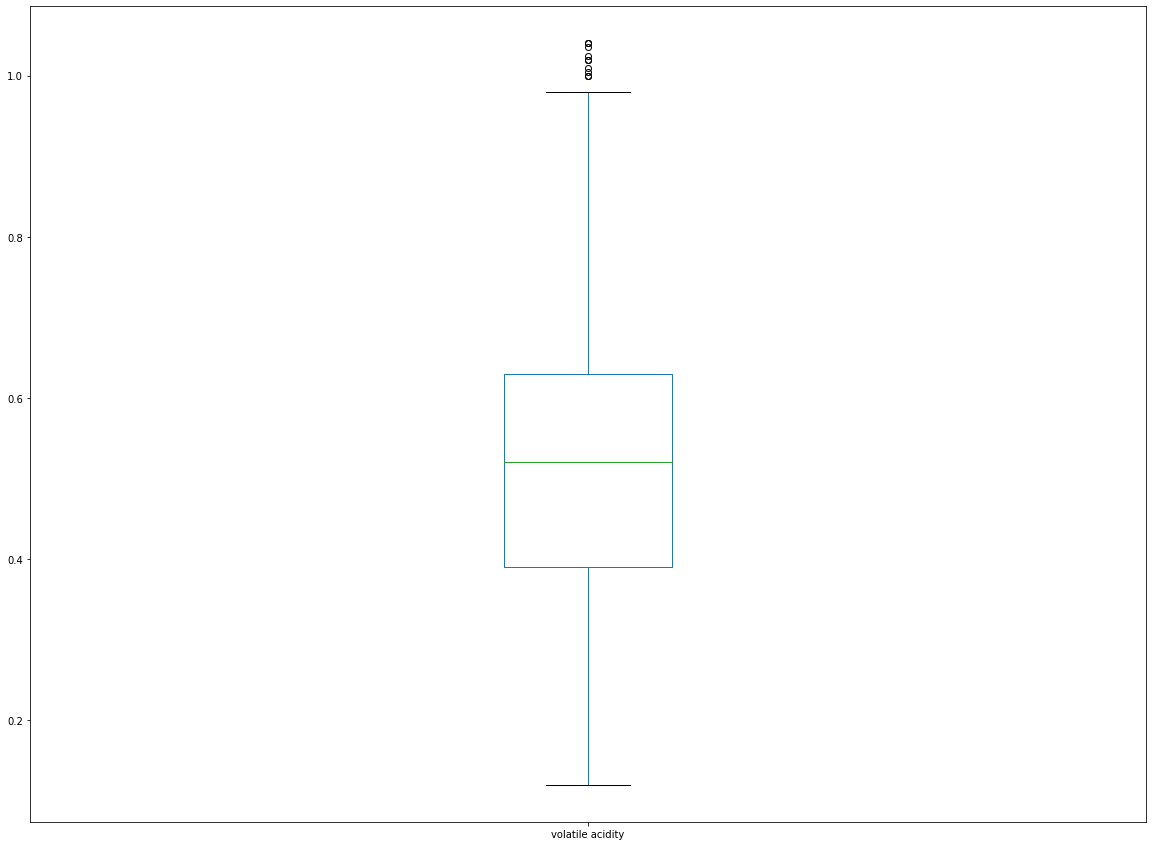

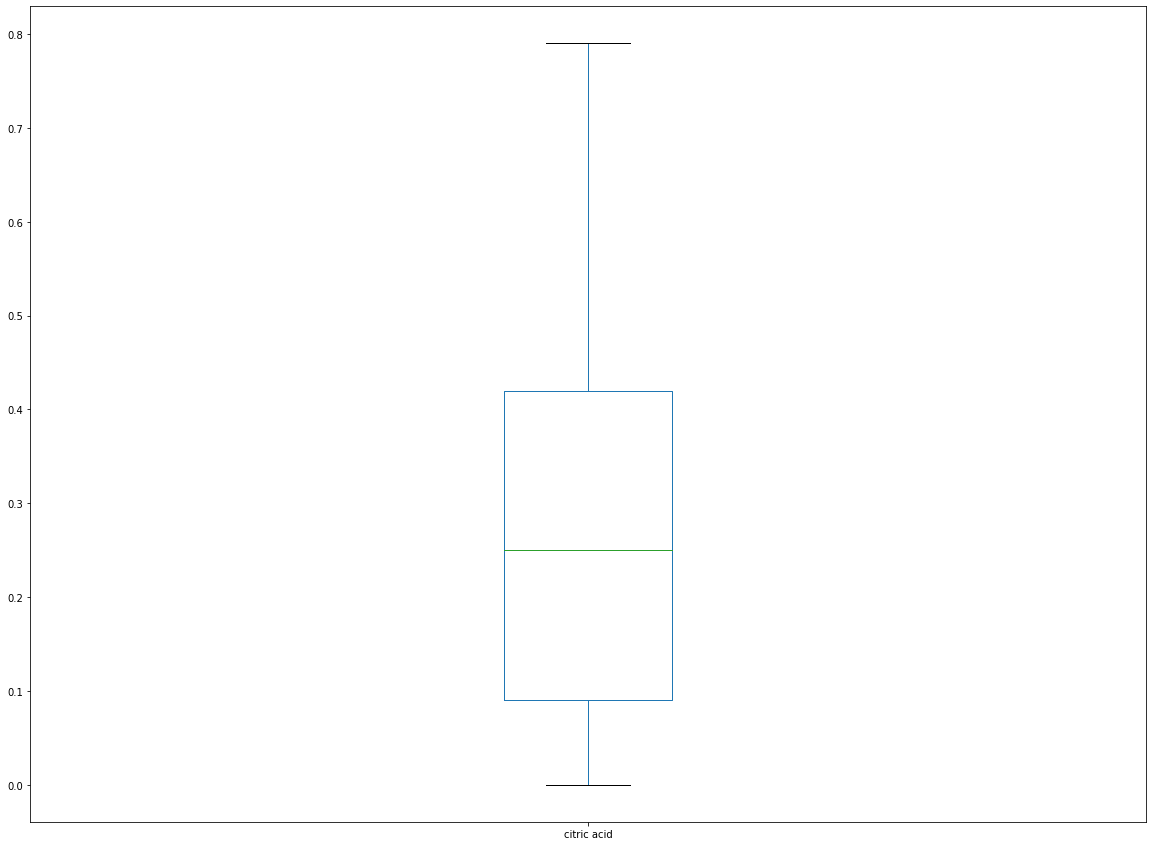

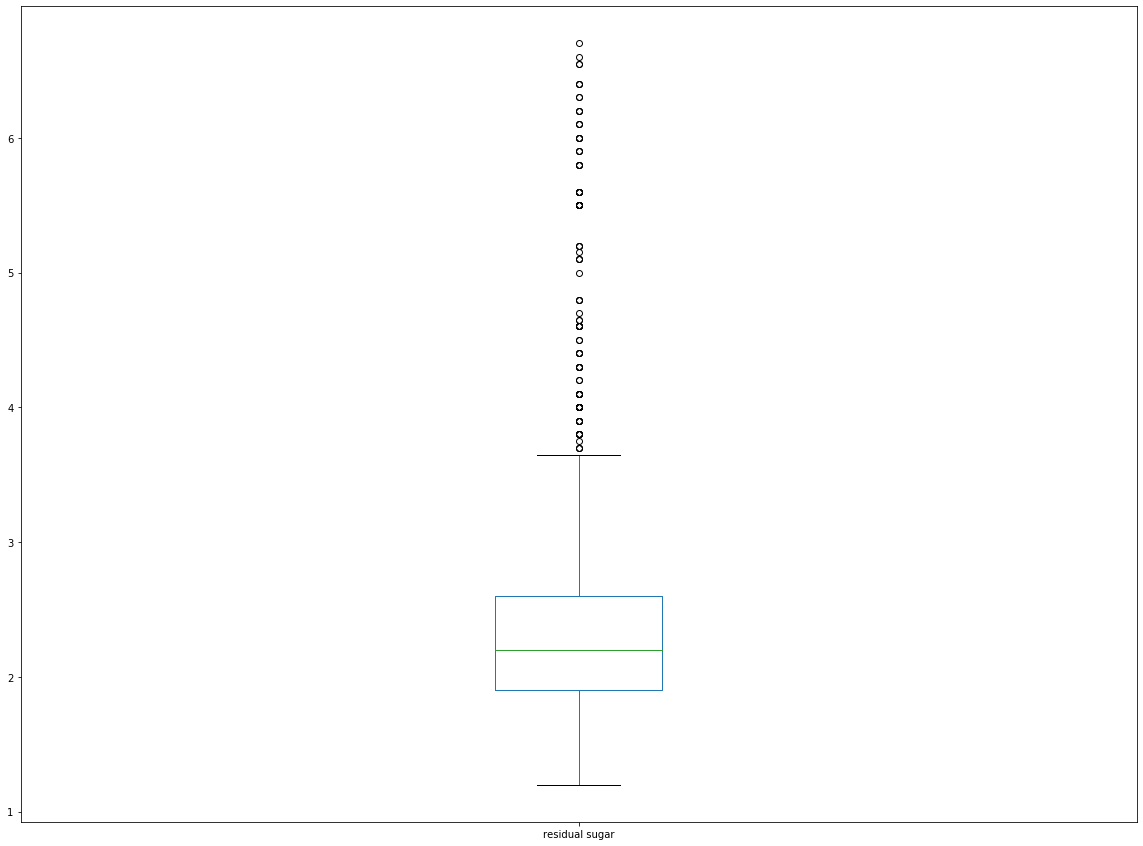

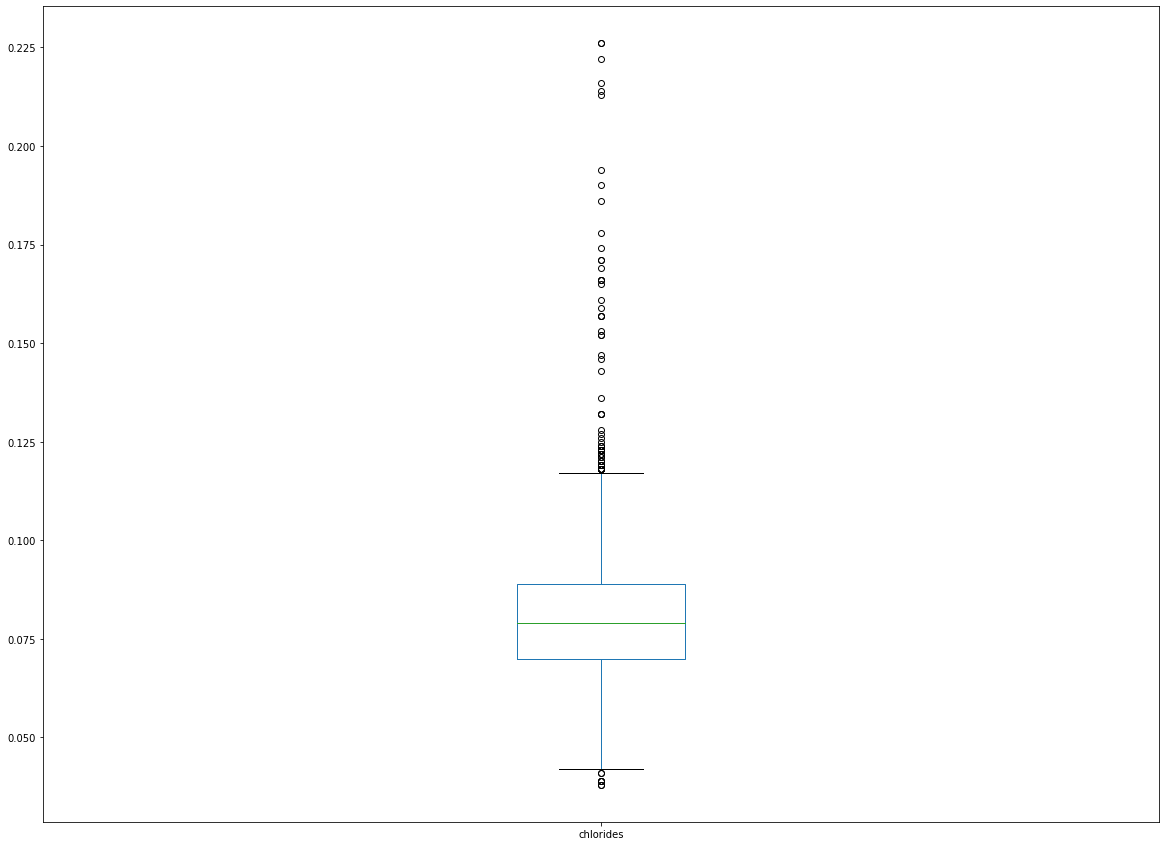

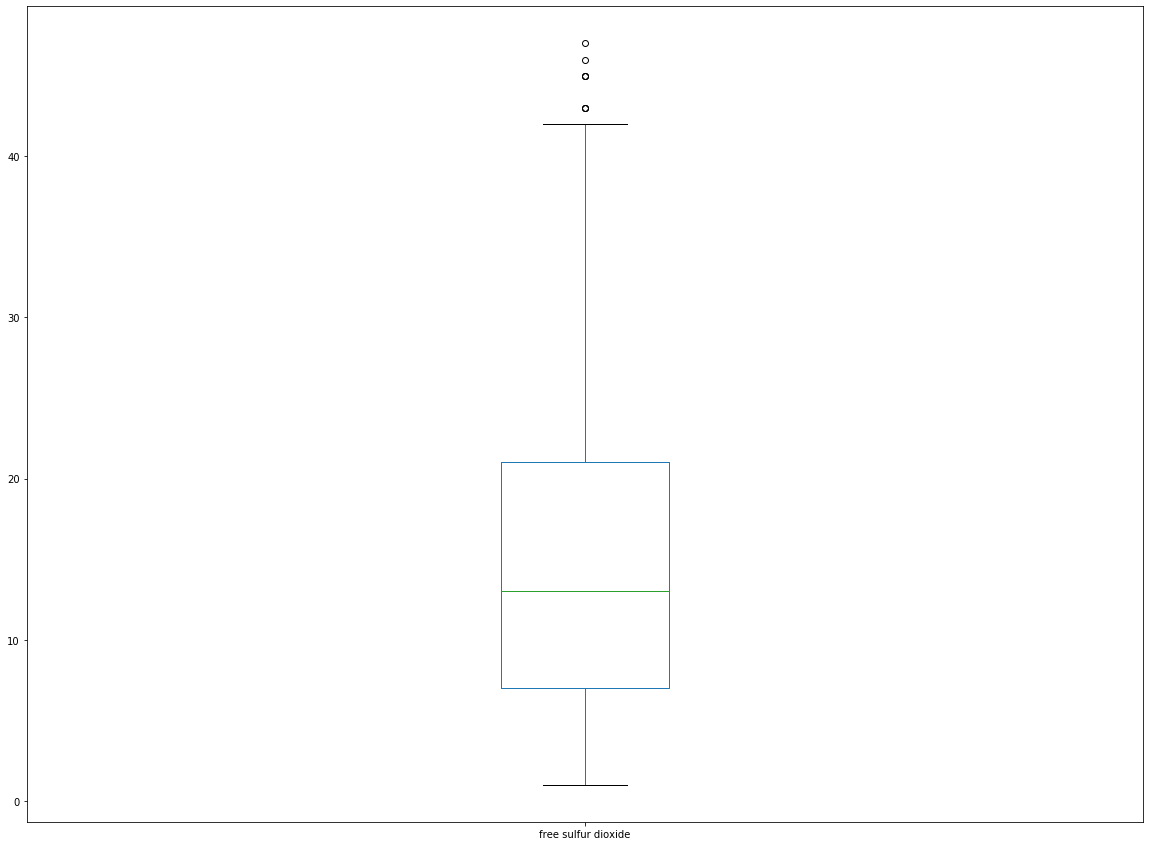

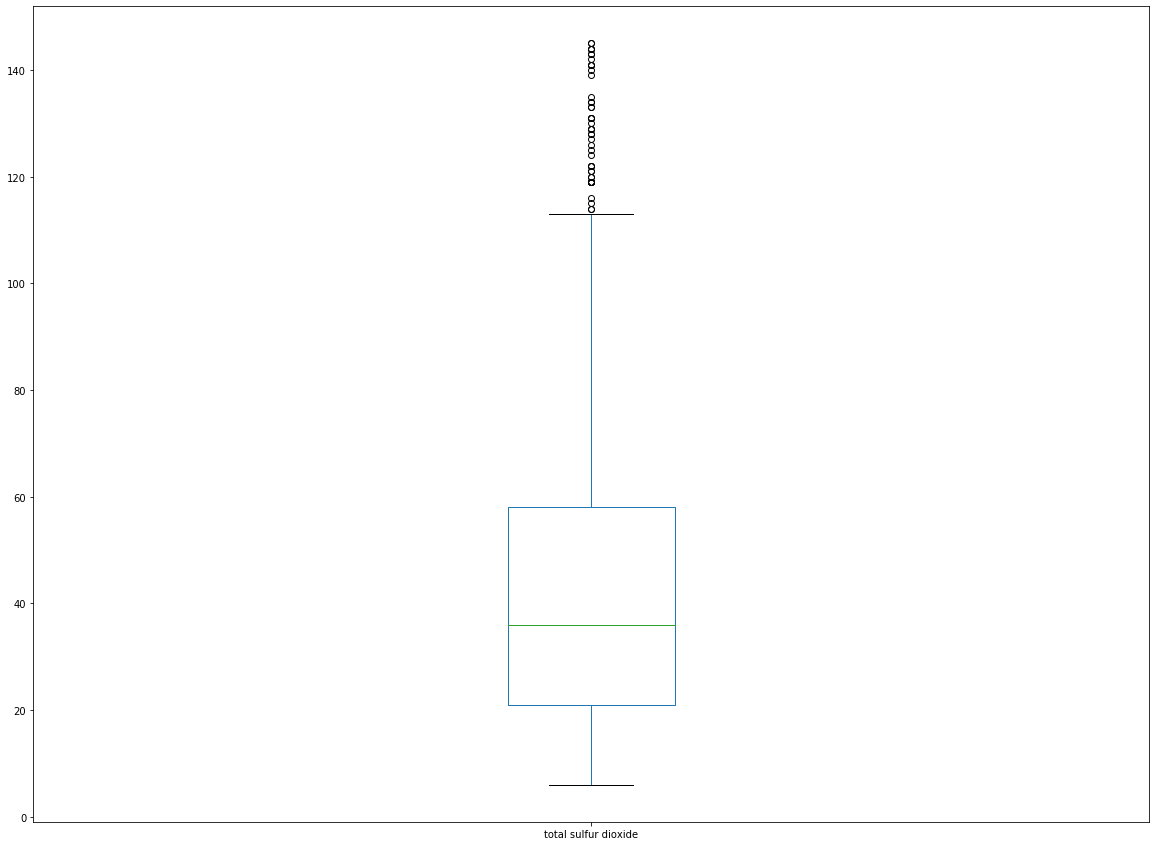

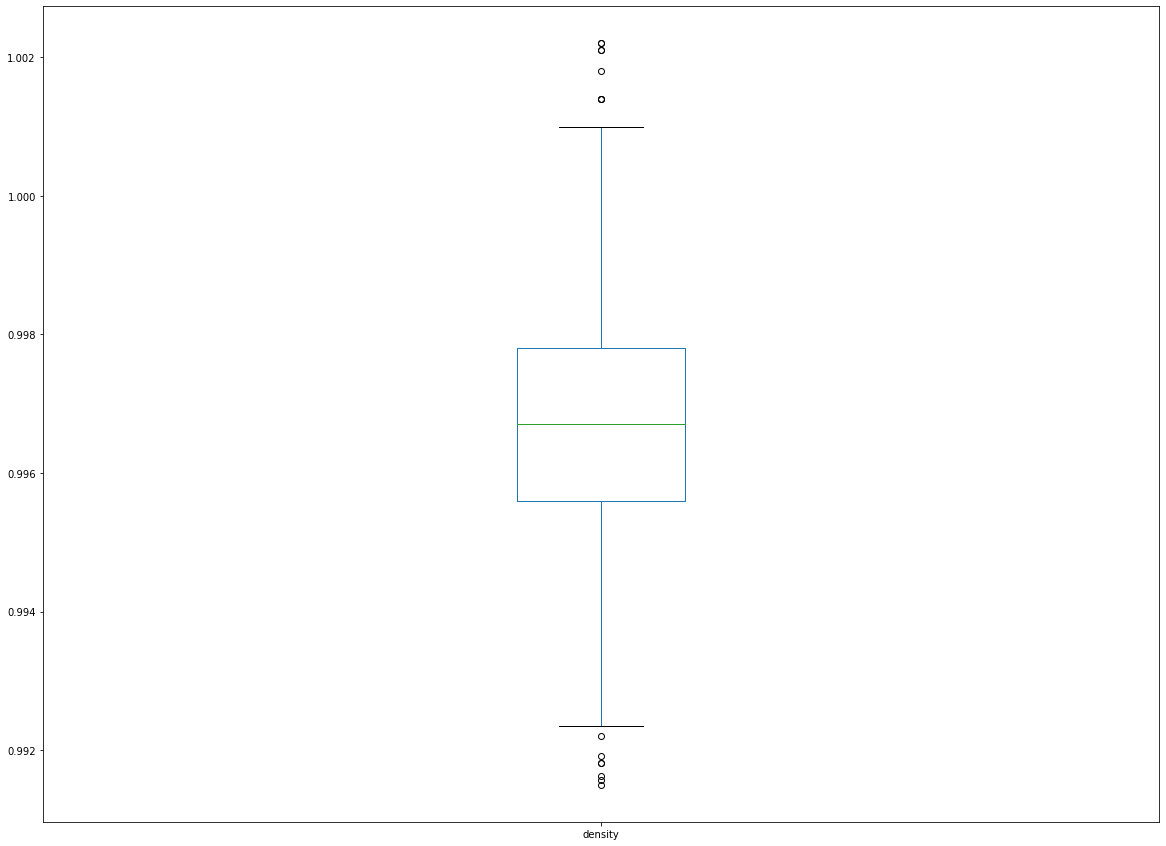

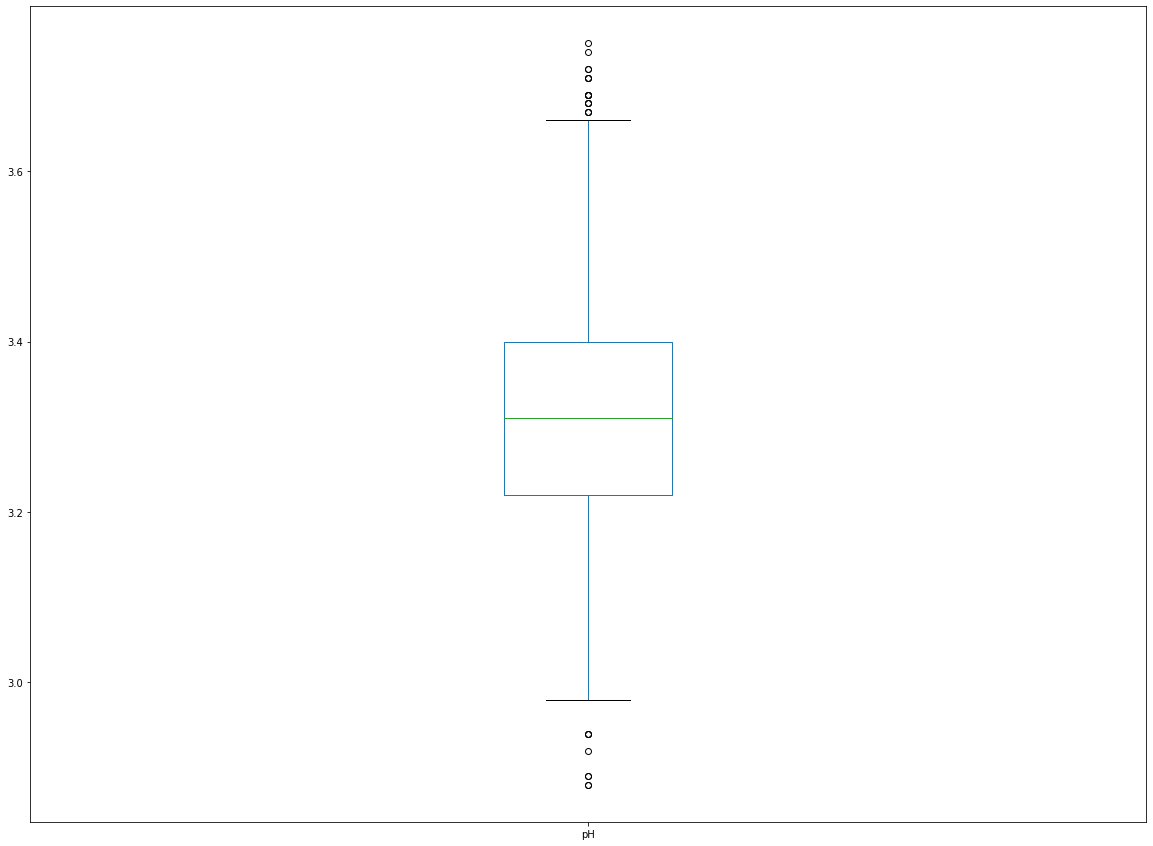

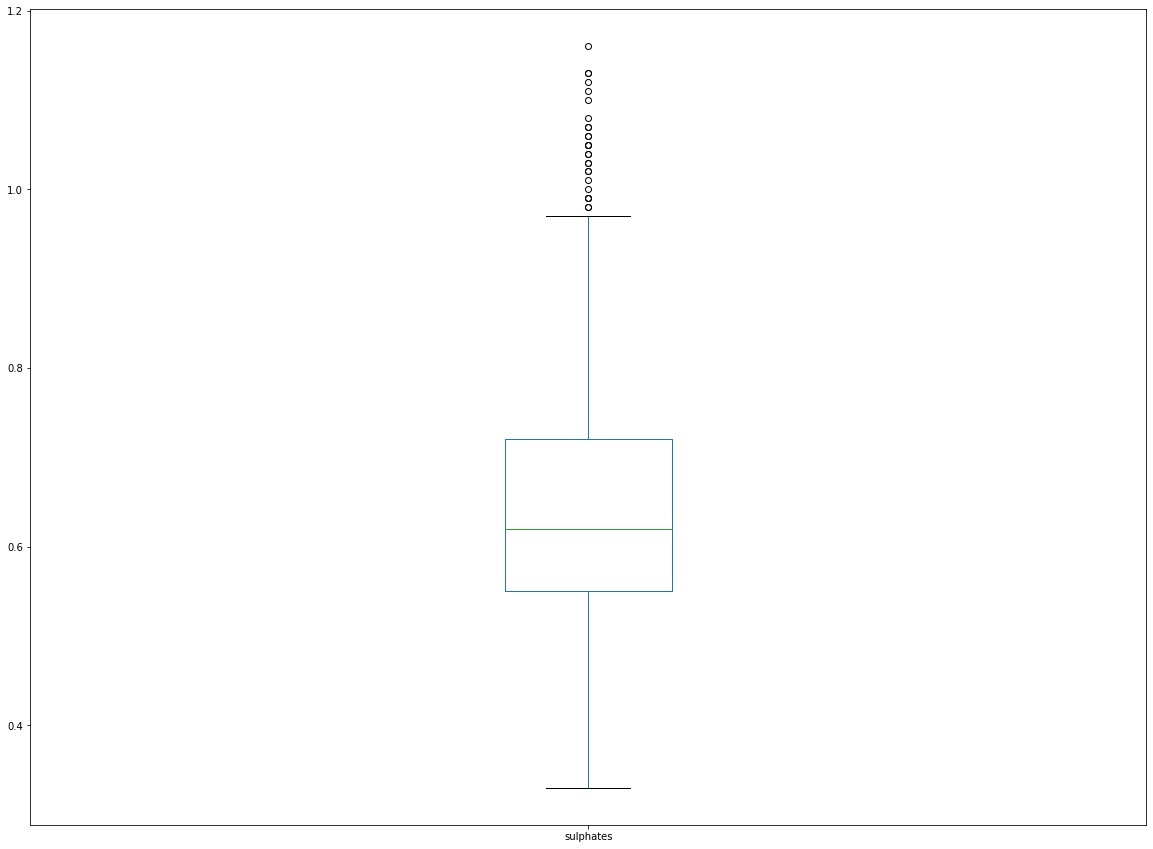

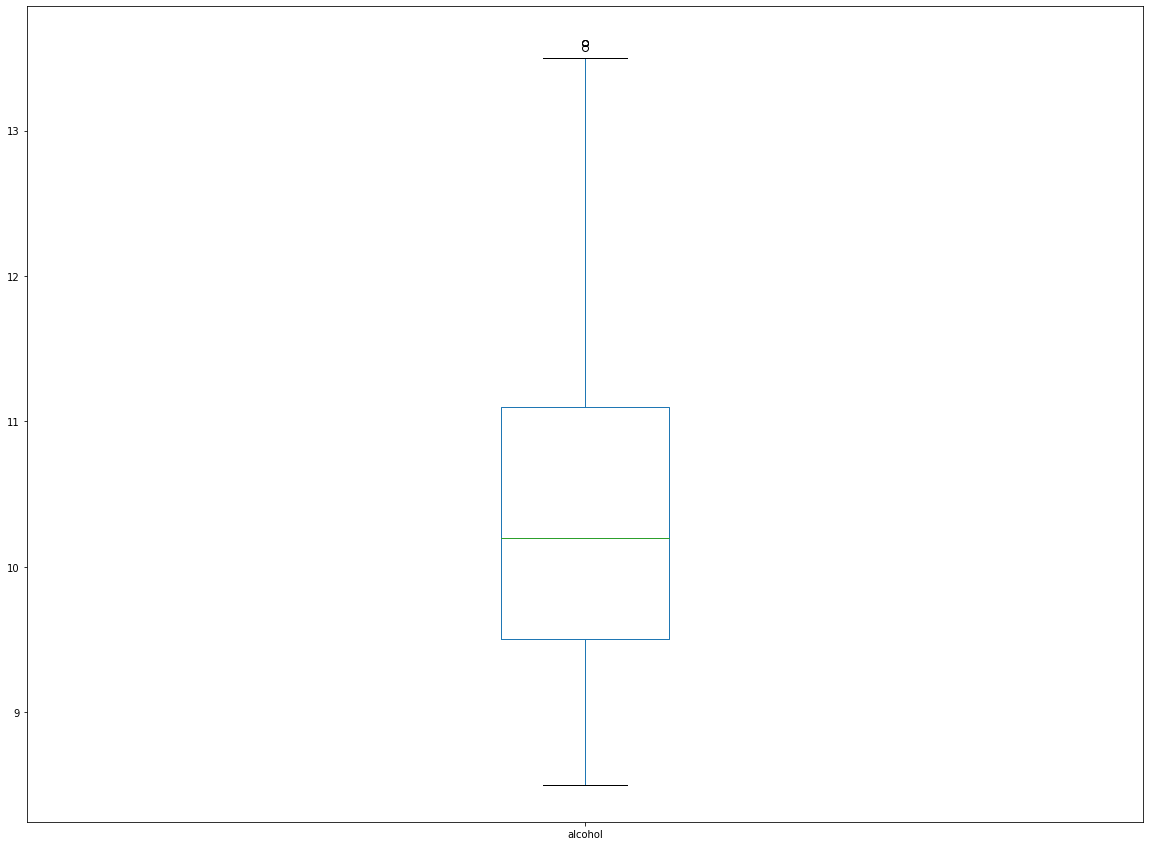

In [19]:
for i in columns[:-1]:
    plt.figure(figsize = (20, 15))
    df_new[i].plot.box()

In [20]:
df_new.skew()                                       #checking for skewness

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [21]:
x = df_new.drop('quality', axis = 1)
y = df_new['quality']

In [22]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new = power_transform(x, method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = x.columns)              

In [23]:
x = df_new

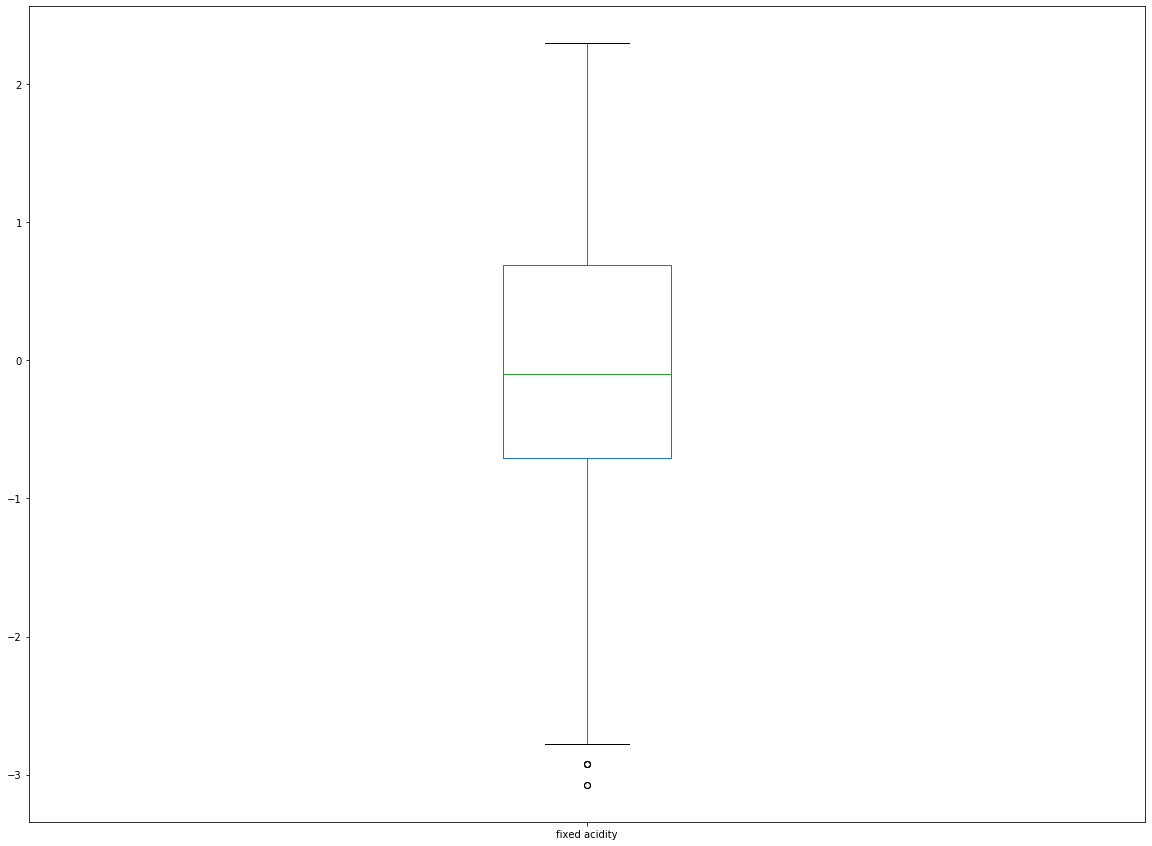

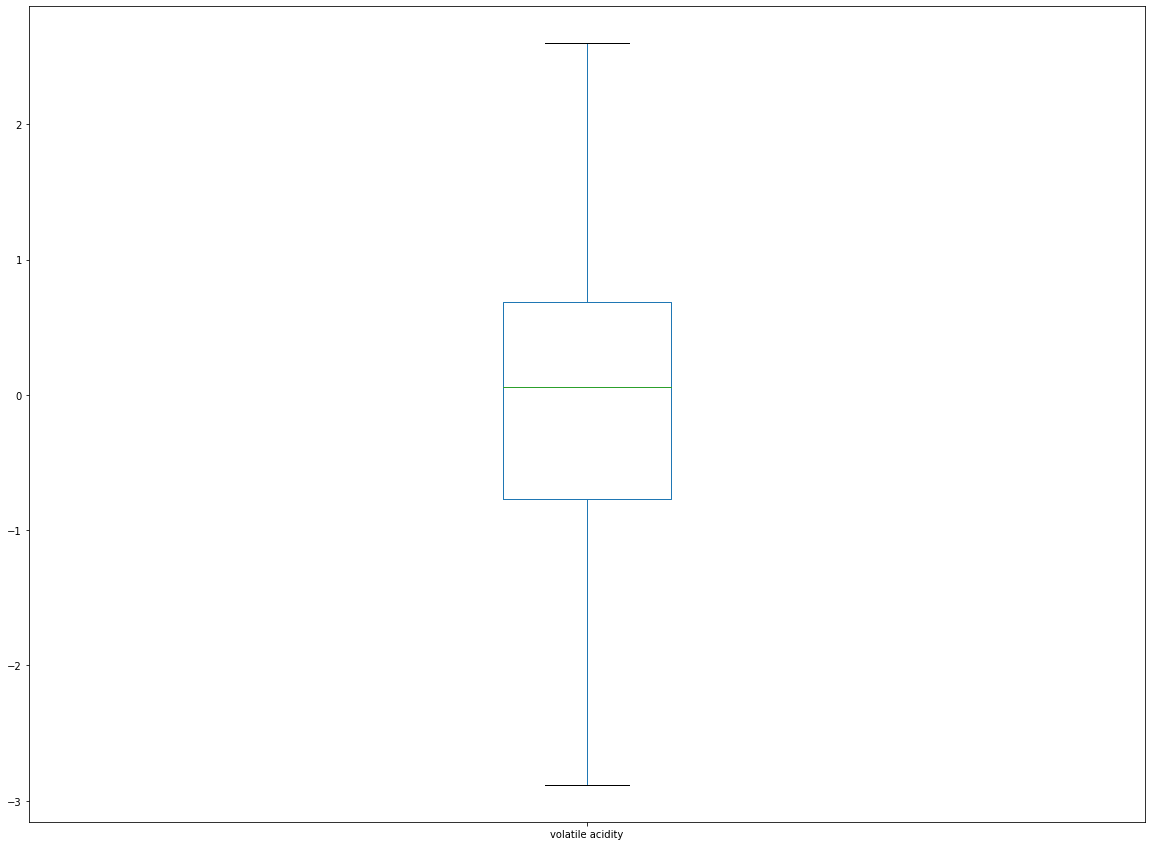

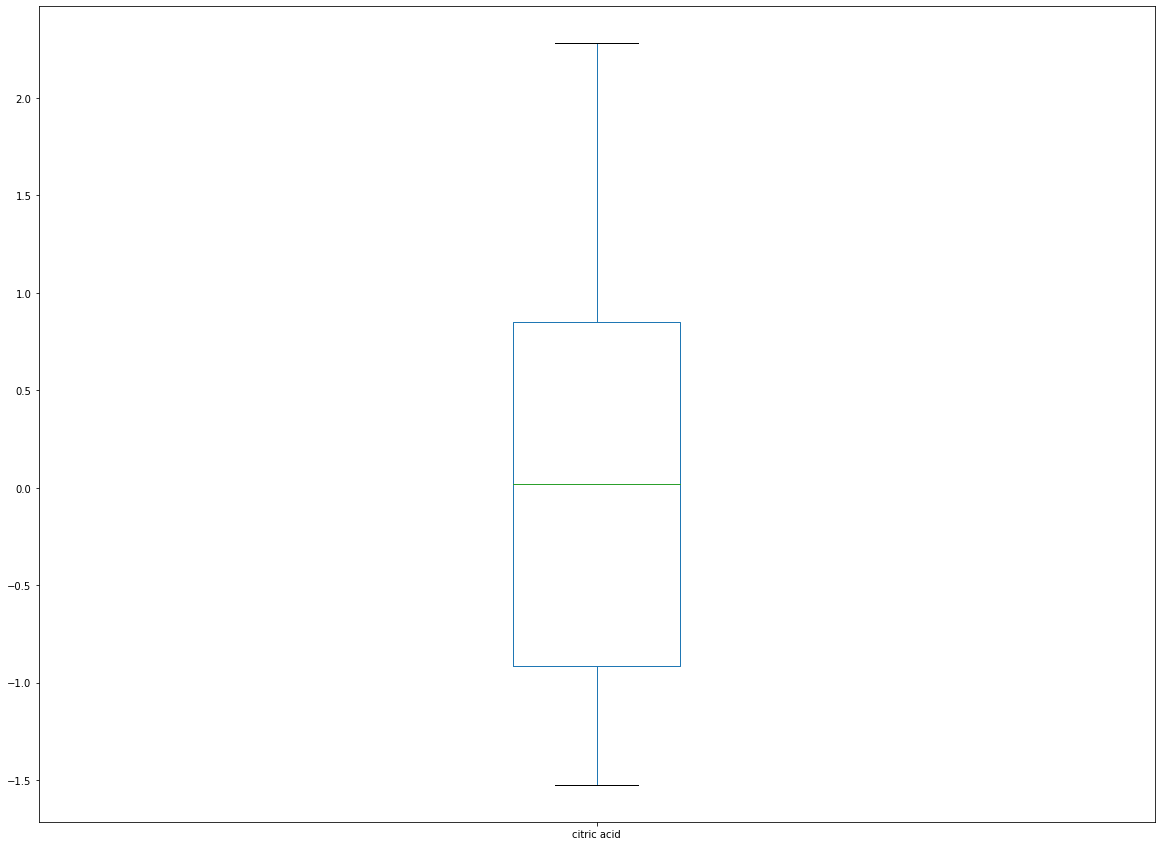

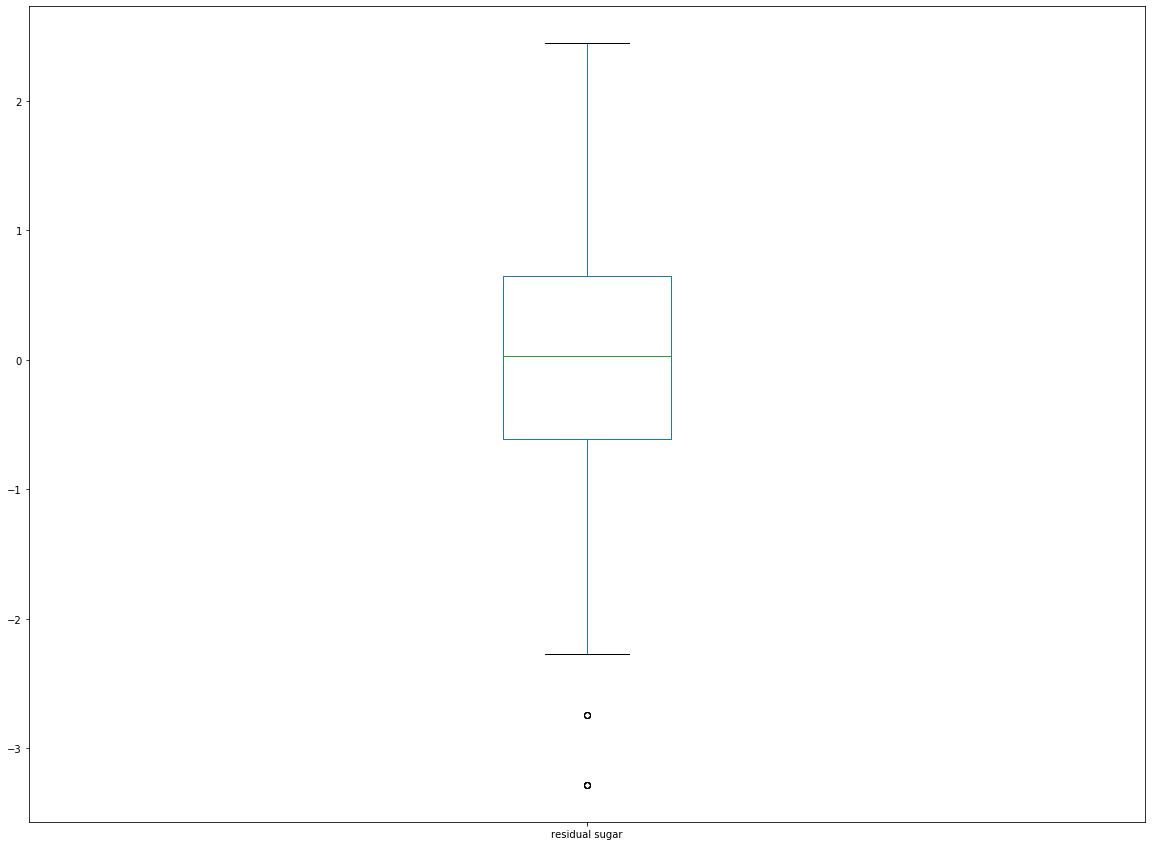

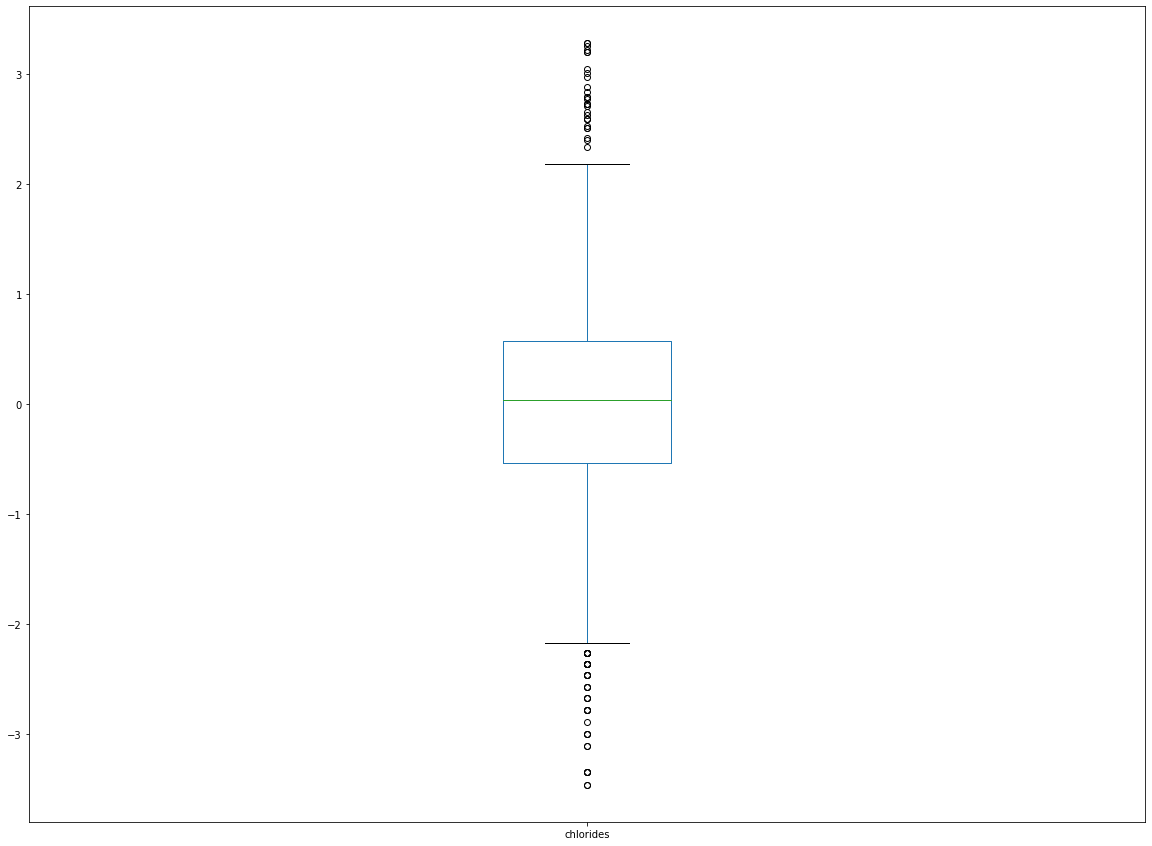

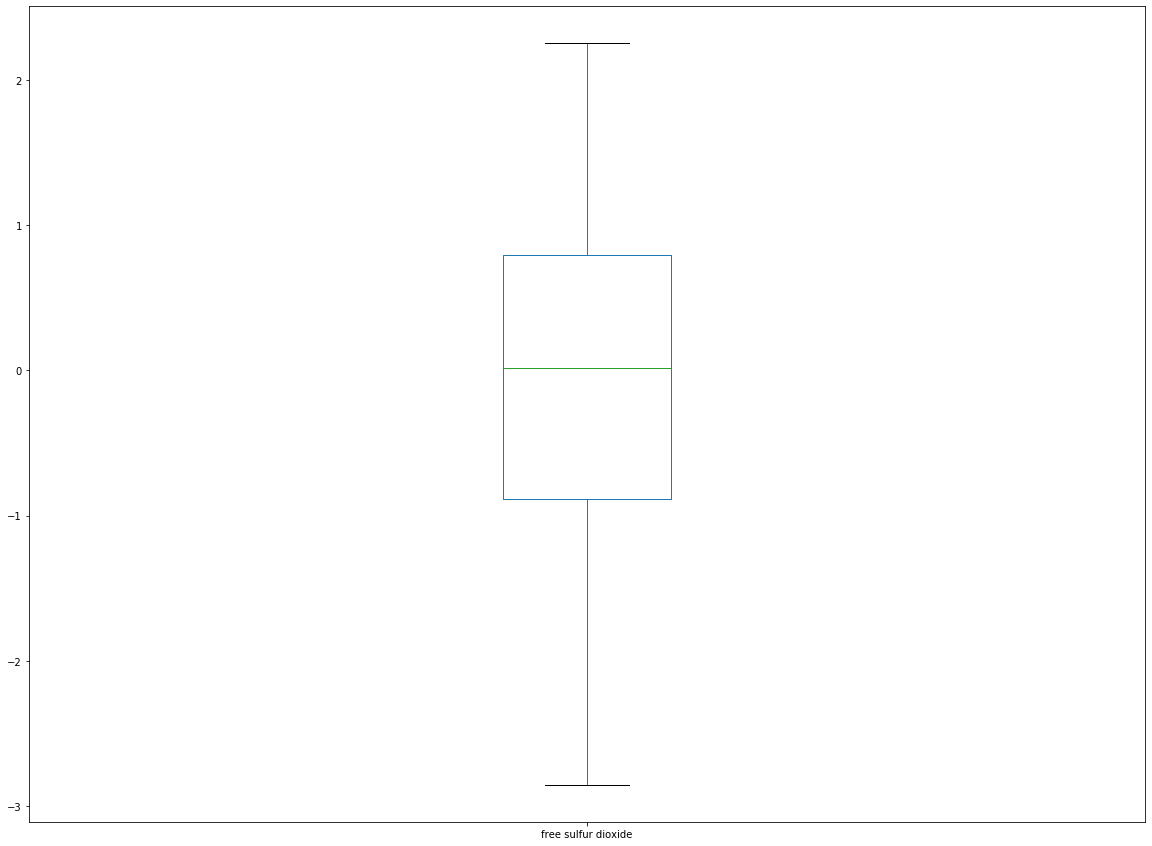

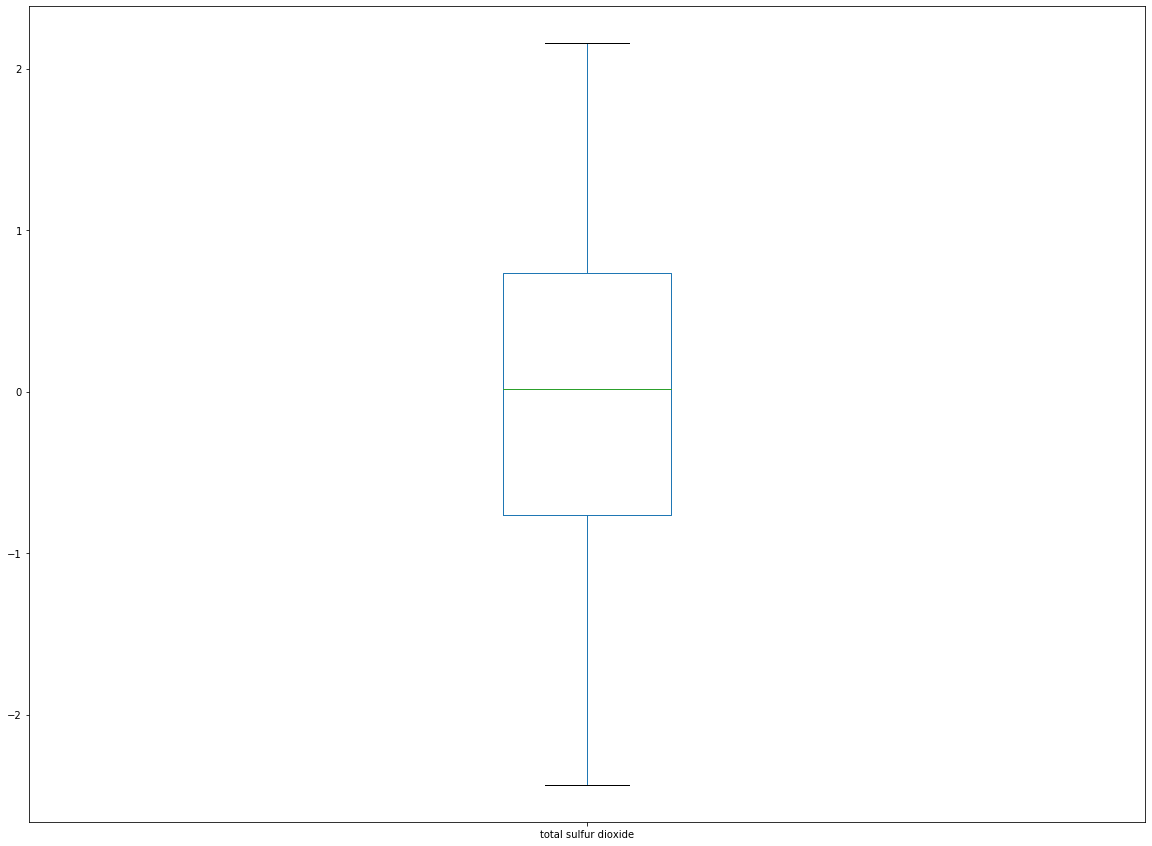

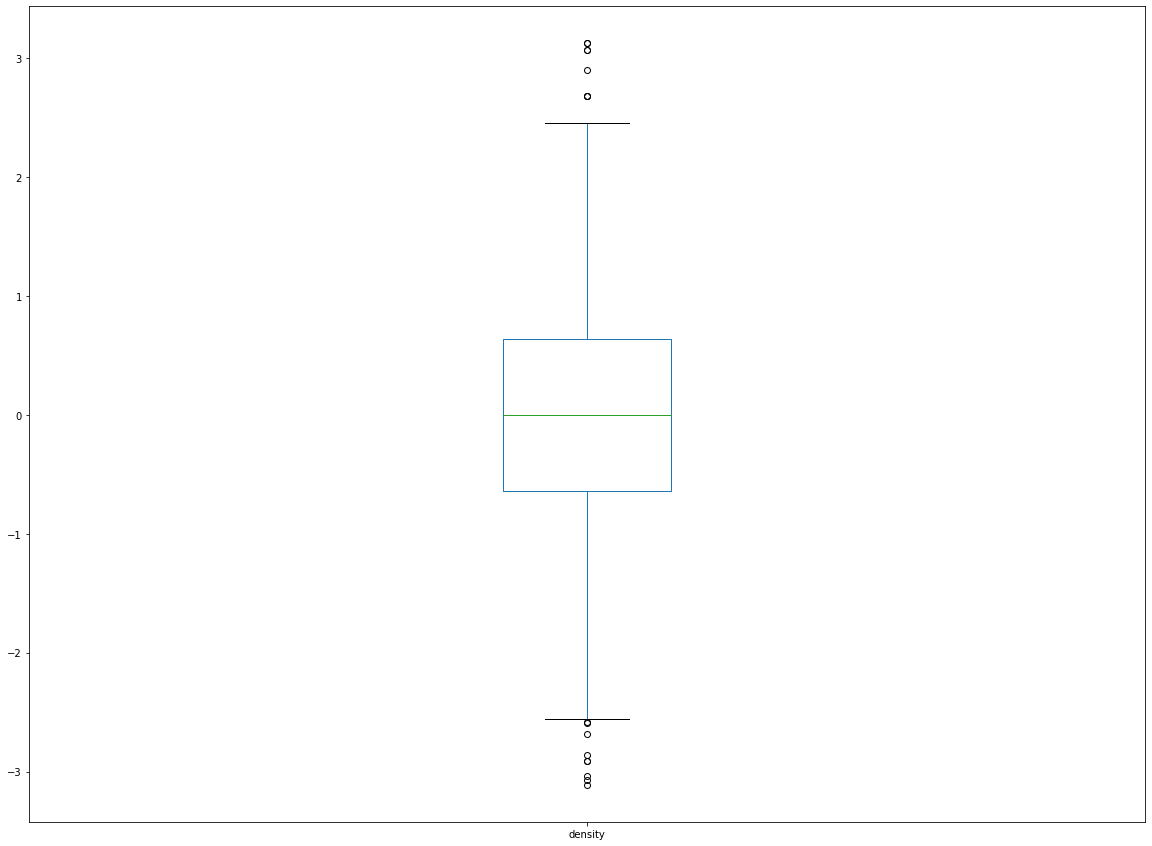

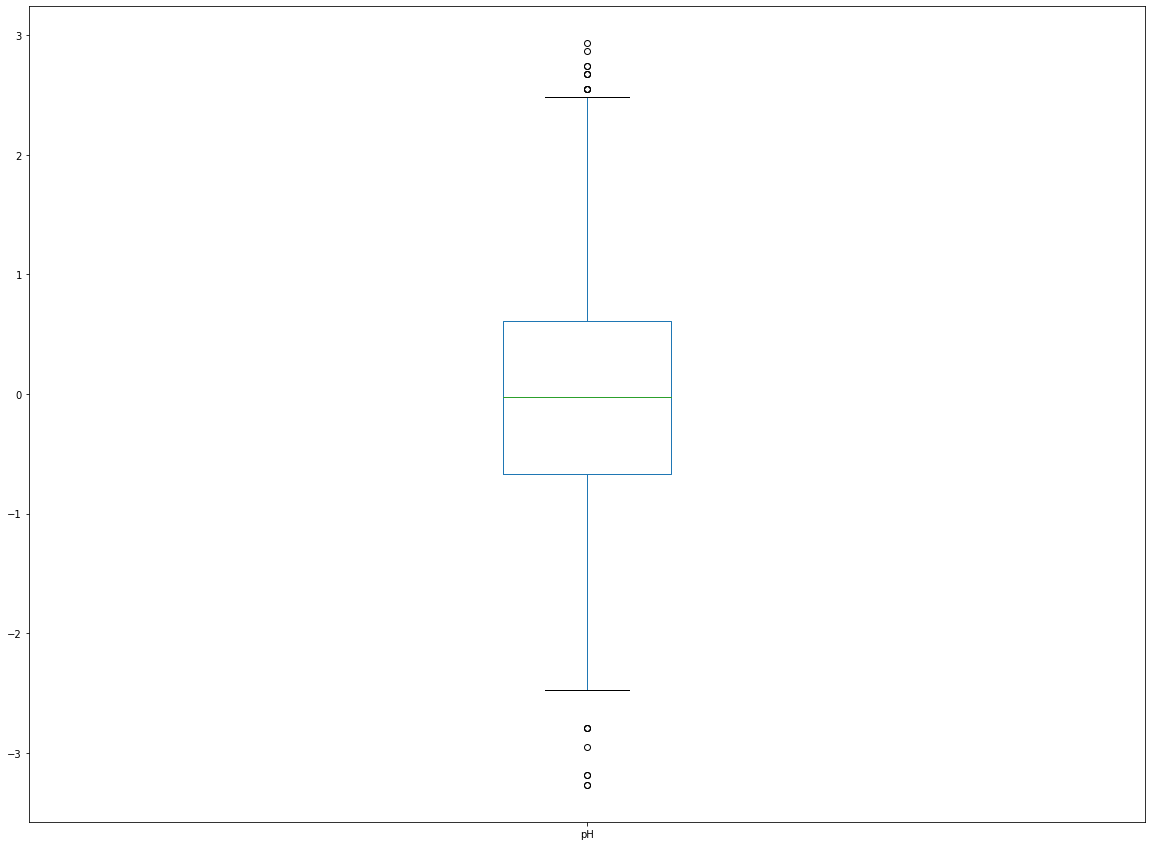

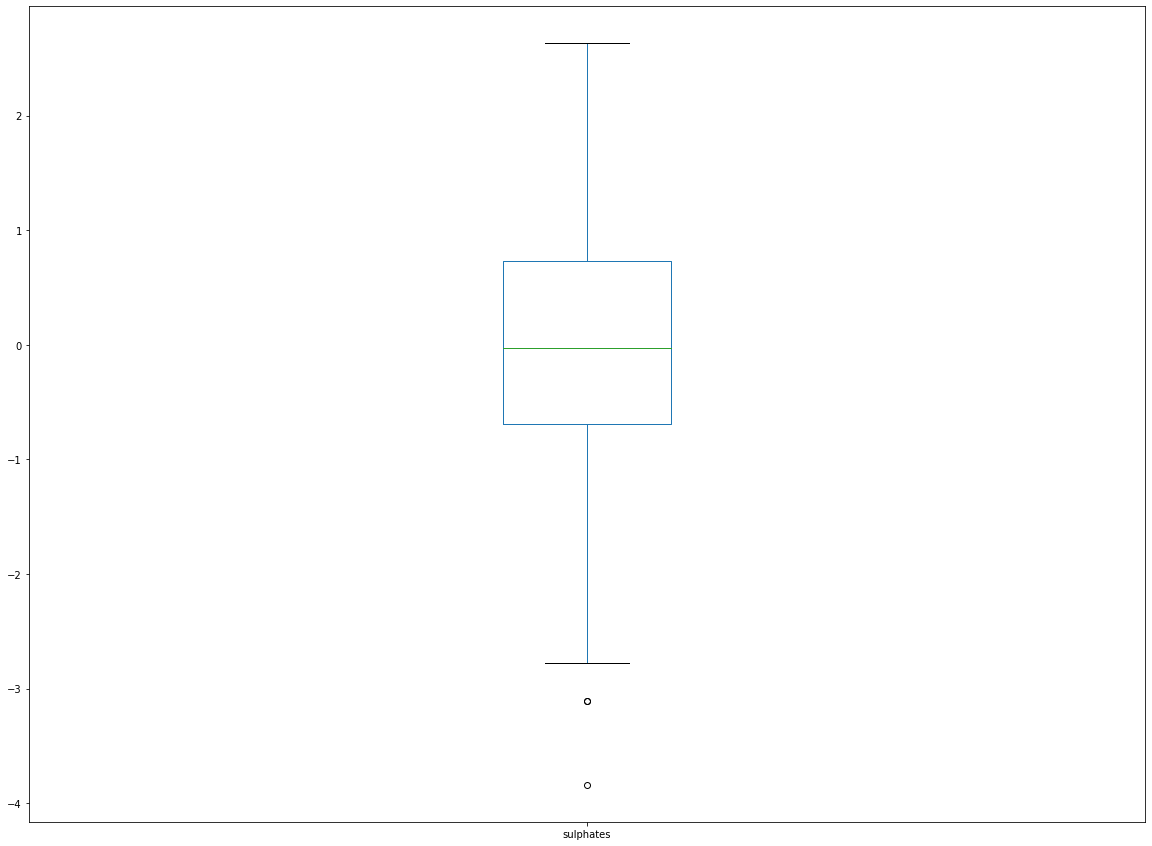

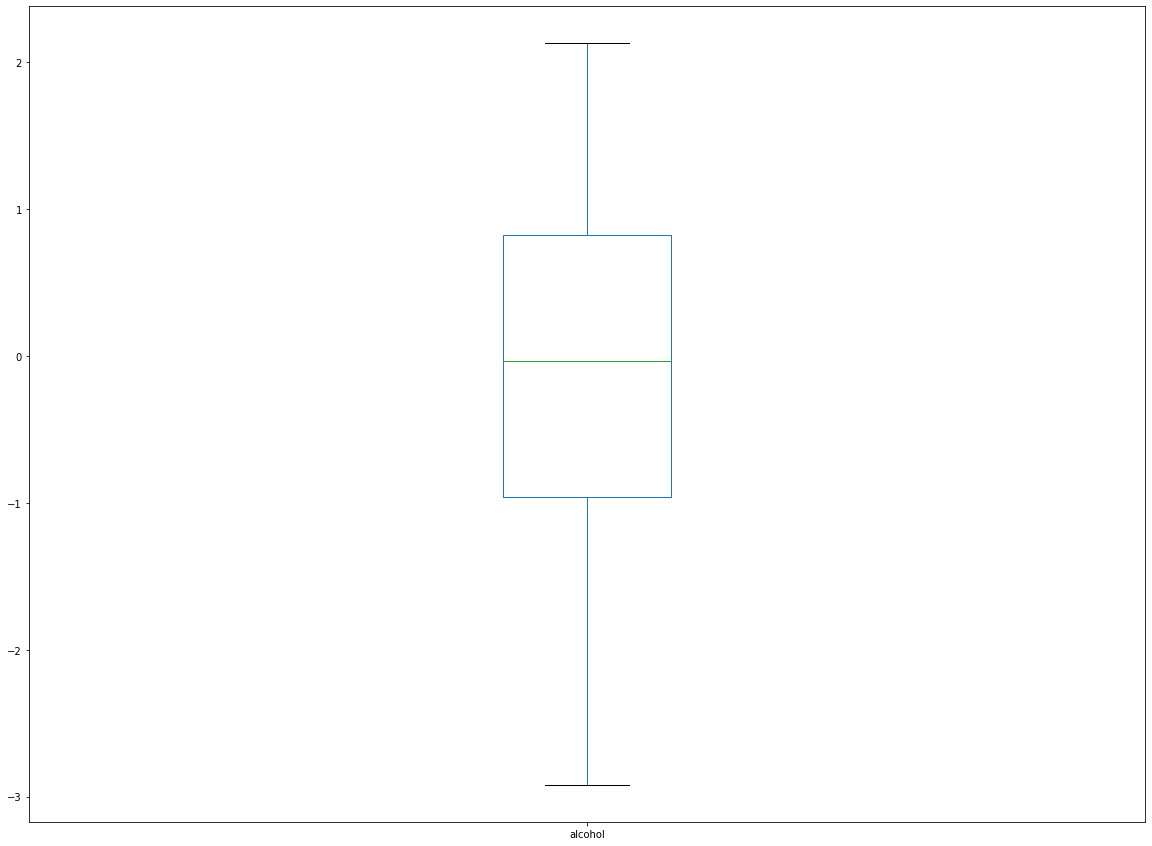

In [24]:
for i in columns[:-1]:
    plt.figure(figsize = (20, 15))
    x[i].plot.box()

Outliers significantly reduced

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

# Best Random State

In [26]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.6720183486238532 on Random State 173


# Creating Train Test Split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 173)

In [28]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print (accuracy_score(y_test, predlr))
print (confusion_matrix(y_test, predlr))
print (classification_report(y_test, predlr))


0.6720183486238532
[[  0   7   6   0   0]
 [  0 162  50   0   0]
 [  0  40 107  10   0]
 [  0   2  24  24   0]
 [  0   0   3   1   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        13
           5       0.77      0.76      0.77       212
           6       0.56      0.68      0.62       157
           7       0.69      0.48      0.56        50
           8       0.00      0.00      0.00         4

    accuracy                           0.67       436
   macro avg       0.40      0.39      0.39       436
weighted avg       0.65      0.67      0.66       436



In [29]:
nb = GaussianNB()
nb.fit(x_train, y_train)
prednb = nb.predict(x_test)
print (accuracy_score(y_test, prednb))
print (confusion_matrix(y_test, prednb))
print (classification_report(y_test, prednb))


0.6009174311926605
[[  4   6   3   0   0]
 [  9 161  41   1   0]
 [  4  60  66  27   0]
 [  1   0  18  31   0]
 [  0   0   1   3   0]]
              precision    recall  f1-score   support

           4       0.22      0.31      0.26        13
           5       0.71      0.76      0.73       212
           6       0.51      0.42      0.46       157
           7       0.50      0.62      0.55        50
           8       0.00      0.00      0.00         4

    accuracy                           0.60       436
   macro avg       0.39      0.42      0.40       436
weighted avg       0.59      0.60      0.59       436



In [30]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
preddtc = DTC.predict(x_test)
print (accuracy_score(y_test, preddtc))
print (confusion_matrix(y_test, preddtc))
print (classification_report(y_test, preddtc))


0.6100917431192661
[[  0   8   5   0   0]
 [ 10 144  47   9   2]
 [  4  44  93  14   2]
 [  1   6  14  28   1]
 [  0   0   1   2   1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        13
           5       0.71      0.68      0.70       212
           6       0.58      0.59      0.59       157
           7       0.53      0.56      0.54        50
           8       0.17      0.25      0.20         4

    accuracy                           0.61       436
   macro avg       0.40      0.42      0.41       436
weighted avg       0.62      0.61      0.61       436



In [31]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print (accuracy_score(y_test, predrf))
print (confusion_matrix(y_test, predrf))
print (classification_report(y_test, predrf))


0.7339449541284404
[[  0   7   6   0   0]
 [  0 180  32   0   0]
 [  0  35 117   5   0]
 [  0   3  24  23   0]
 [  0   0   4   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        13
           5       0.80      0.85      0.82       212
           6       0.64      0.75      0.69       157
           7       0.82      0.46      0.59        50
           8       0.00      0.00      0.00         4

    accuracy                           0.73       436
   macro avg       0.45      0.41      0.42       436
weighted avg       0.71      0.73      0.72       436



In [32]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print (accuracy_score(y_test, predsvc))
print (confusion_matrix(y_test, predsvc))
print (classification_report(y_test, predsvc))


0.6834862385321101
[[  0   8   5   0   0]
 [  0 163  49   0   0]
 [  0  37 115   5   0]
 [  0   3  27  20   0]
 [  0   0   4   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        13
           5       0.77      0.77      0.77       212
           6       0.57      0.73      0.64       157
           7       0.80      0.40      0.53        50
           8       0.00      0.00      0.00         4

    accuracy                           0.68       436
   macro avg       0.43      0.38      0.39       436
weighted avg       0.67      0.68      0.67       436



In [33]:
cvs = cross_val_score(LR, x, y, cv = 5)
print ('Cross Validation Score for Logistic Regression model is :', cvs.mean())

Cross Validation Score for Logistic Regression model is : 0.5693044199549708


In [34]:
cvs = cross_val_score(DTC, x, y, cv = 5)
print ('Cross Validation Score for Decision Tree Classifier model is :', cvs.mean())

Cross Validation Score for Decision Tree Classifier model is : 0.4686337243749259


In [35]:
cvs = cross_val_score(rf, x, y, cv = 5)
print ('Cross Validation Score for Random Forest Classifier model is :', cvs.mean())

Cross Validation Score for Random Forest Classifier model is : 0.5741248963147292


In [36]:
cvs = cross_val_score(nb, x, y, cv = 5)
print ('Cross Validation Score for Gaussian NB is :', cvs.mean())

Cross Validation Score for Gaussian NB is : 0.5534399810404077


In [37]:
cvs = cross_val_score(svc, x, y, cv = 5)
print ('Cross Validation Score for Support Vector Classifier model is :', cvs.mean())

Cross Validation Score for Support Vector Classifier model is : 0.5706766204526603


Minimum difference in accuracy and cross val score is in GaussianNB, so this is our best model

In [38]:
import joblib

joblib.dump(nb, 'Wine_QNB.obj')

['Wine_QNB.obj']